# Libraries

## Include

In [1]:
using Revise

## Algorithms

In [2]:
using DifferentialEquations
using Optim
using Statistics
using Distances

## Data

In [4]:
using CSV
using DataFrames
using DataFramesMeta
using Chain: @chain
using Pipe: @pipe
using DataStructures

## Plotting

In [5]:
using Plots
using StatsPlots
pyplot()

Plots.PyPlotBackend()

## Modelling framework

In [6]:
includet("models/base.jl")

# Data

We don't need much data, but having something to put in our plots would be handy.

### Experimental data

In [7]:
data = map(["wt", "ifnko"]) do geno
    active = @linq CSV.read("data_old/data_$(geno)_active.csv", DataFrame) |>
        transform(name="active") |>
        select(genotype=:genotype, age=:age, name=:name, value=:active)
    counts = @linq CSV.read("data_old/data_$(geno)_counts.csv", DataFrame) |>
        transform(name="total") |>
        select(genotype=:genotype, age=:age, name=:name, value=:count)
    vcat([active, counts]...)
end
data = vcat(data...)

┌ Warning: Using an un-quoted Symbol on the LHS is deprecated. Write :name = ... instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/parsing.jl:298
┌ Warning: Using an un-quoted Symbol on the LHS is deprecated. Write :genotype = ... instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/parsing.jl:298
┌ Warning: Using an un-quoted Symbol on the LHS is deprecated. Write :age = ... instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/parsing.jl:298
┌ Warning: Using an un-quoted Symbol on the LHS is deprecated. Write :name = ... instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/parsing.jl:298
┌ Warning: Using an un-quoted Symbol on the LHS is deprecated. Write :value = ... instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/parsing.jl:298
┌ Warning: Using an un-quoted Symbol on the LHS is deprecated. Write :name = ... instead.
└ @ DataFramesMeta /home/j

41×4 DataFrame
 Row │ genotype  age    name    value       
     │ String7   Int64  String  Float64     
─────┼──────────────────────────────────────
   1 │ wt          660  active     0.234043
   2 │ wt          660  active     0.15
   3 │ wt          660  active     0.2
   4 │ wt          660  active     0.228571
   5 │ wt           60  active     0.586207
   6 │ wt           60  active     0.467742
   7 │ wt           60  active     0.280702
   8 │ wt           60  total    764.0
   9 │ wt           60  total    755.5
  10 │ wt           60  total   1254.5
  11 │ wt           60  total    845.5
  ⋮  │    ⋮        ⋮      ⋮          ⋮
  32 │ ifnko        60  total    378.0
  33 │ ifnko        60  total    494.0
  34 │ ifnko        60  total    383.0
  35 │ ifnko        60  total    393.0
  36 │ ifnko       180  total    178.0
  37 │ ifnko       180  total    255.0
  38 │ ifnko       180  total    113.0
  39 │ ifnko       660  total    119.0
  40 │ ifnko       660  total    162.0
  41 │ ifnko       660  total    196.0
                             20 rows omitted

### Simulation data

In [8]:
sim_ifnko_both = CSV.read("data_old/solution_ifnko_self_renewal_and_quiescence.csv", DataFrame)
sim_wt_both = CSV.read("data_old/solution_wt_self_renewal_and_quiescence.csv", DataFrame)
sim = vcat(@transform(sim_wt_both, genotype="wt"), @transform(sim_ifnko_both, genotype="ko"))

┌ Warning: Using an un-quoted Symbol on the LHS is deprecated. Write :genotype = ... instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/parsing.jl:298
┌ Warning: Using an un-quoted Symbol on the LHS is deprecated. Write :genotype = ... instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/parsing.jl:298


1087×6 DataFrame
  Row │ t           active    counts    b         r         genotype 
      │ Float64     Float64   Float64   Float64   Float64   String   
──────┼──────────────────────────────────────────────────────────────
    1 │   0.0       0.474127  1986.31   0.482161  0.842565  wt
    2 │   0.157915  0.474119  1981.27   0.482174  0.842313  wt
    3 │   0.271147  0.474101  1977.67   0.482184  0.842133  wt
    4 │   0.423967  0.474068  1972.82   0.482197  0.84189   wt
    5 │   0.599921  0.474017  1967.26   0.482212  0.84161   wt
    6 │   0.804687  0.473946  1960.82   0.48223   0.841284  wt
    7 │   1.0378    0.473854  1953.52   0.48225   0.840913  wt
    8 │   1.29979   0.473741  1945.36   0.482273  0.840497  wt
    9 │   1.59052   0.473609  1936.35   0.482298  0.840035  wt
   10 │   1.90964   0.473459  1926.54   0.482325  0.839528  wt
   11 │   2.25654   0.473291  1915.94   0.482355  0.838978  wt
  ⋮   │     ⋮          ⋮         ⋮         ⋮         ⋮         ⋮
 1078 │ 497.805     0.341451   154.442  0.499911  0.492849  ko
 1079 │ 513.668     0.341449   154.311  0.499927  0.492849  ko
 1080 │ 530.756     0.341446   154.197  0.499942  0.492849  ko
 1081 │ 549.252     0.341445   154.098  0.499954  0.492849  ko
 1082 │ 569.376     0.341443   154.014  0.499964  0.492849  ko
 1083 │ 591.403     0.341442   153.944  0.499973  0.492849  ko
 1084 │ 615.678     0.341441   153.887  0.49998   0.492849  ko
 1085 │ 642.64      0.34144    153.841  0.499986  0.492849  ko
 1086 │ 672.859     0.341439   153.805  0.499991  0.492849  ko
 1087 │ 700.0       0.341439   153.782  0.499993  0.492849  ko
                                                    1066 rows omitted

### Motivation plot
This plot visualises the problem. Due to the specific dynamics in the niche wt has more output from stem cells early in life. Past 400 days of age however, due to the lack of increased quiescence, knockout mice have much more active stem cells and thus higher output.

┌ Warning: Using an un-quoted Symbol on the LHS is deprecated. Write :tapo = ... instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/parsing.jl:298


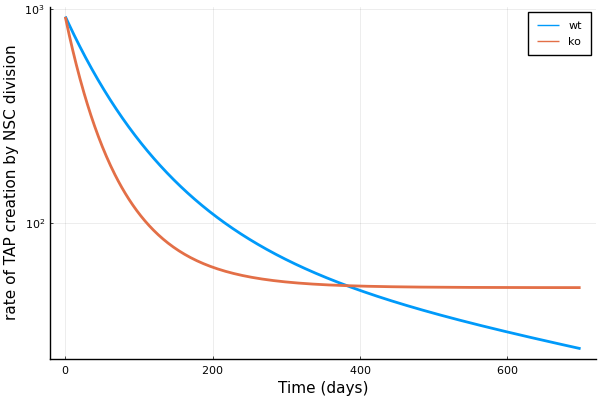

In [9]:
p = plot(yscale=:log10, ylab="rate of TAP creation by NSC division", xlab="Time (days)")
for group in groupby(sim, :genotype)
    group = @transform(group, tapo=(1 .- :b) .* :counts .* :active .* 2 * 0.95)
    @df group plot!(p, :t, :tapo, label=unique(group.genotype)[1], lw=2)
end
p

In [10]:
@chain sim begin
    @transform tapo=(1 .- :b) .* :counts .* :active .* 2 * 0.95 
    groupby(:genotype)
    @combine mean=mean(:tapo)
end

┌ Warning: Using an un-quoted Symbol on the LHS is deprecated. Write :tapo = ... instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/parsing.jl:298
┌ Warning: Using an un-quoted Symbol on the LHS is deprecated. Write :mean = ... instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/parsing.jl:298


2×2 DataFrame
 Row │ genotype  mean    
     │ String    Float64 
─────┼───────────────────
   1 │ wt        141.412
   2 │ ko        228.919

# Regular Kalamakis model

## Definition

In [11]:
includet("models/nsc_kalamakis.jl")

In [12]:
times = collect(1:0.1:700.0)
model = KalamakisFull((0.0, 700.0), times, zeros(Int64, length(times)), Dict(:pₛ => 0.95))

KalamakisFull((0.0, 700.0), [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9  …  699.1, 699.2, 699.3, 699.4, 699.5, 699.6, 699.7, 699.8, 699.9, 700.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [6 => 0.95])

In [13]:
parameter_names(model)

6-element Vector{Symbol}:
 :nsc₀
 :r₀
 :βr
 :b₀
 :βb
 :pₛ

## Previously estimated parameters

In [14]:
param = Dict(
    :wt => Dict(
        :nsc₀ => 1986.0,
        :r₀ => 0.8426,
        :βr => 0.001891,
        :b₀ => 0.4822,
        :βb => 0.004862
    ),
    :ko => Dict(
        :nsc₀ => 2500.0,
        :r₀ => 0.4928,
        :βr => 1e-12,
        :b₀ => 0.4455,
        :βb => 0.01288
    )
)

Dict{Symbol, Dict{Symbol, Float64}} with 2 entries:
  :wt => Dict(:βb=>0.004862, :b₀=>0.4822, :βr=>0.001891, :r₀=>0.8426, :nsc₀=>19…
  :ko => Dict(:βb=>0.01288, :b₀=>0.4455, :βr=>1.0e-12, :r₀=>0.4928, :nsc₀=>2500…

### Solutions

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


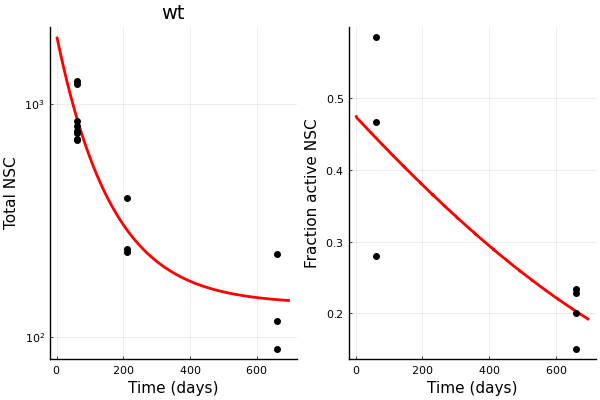

In [15]:
sim = simulate(model, param[:wt]) |> link(model)
ylabs = link_names(model)
p1 = plot(times, sim[:,1], lab="", lc=:red, lw=2, title="wt", yscale=:log10, ylab=ylabs[1])
@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
p2 = plot(times, sim[:,2], lab="", lc=:red, lw=2, ylab=ylabs[2])
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
plot(p1, p2, xlab="Time (days)")

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


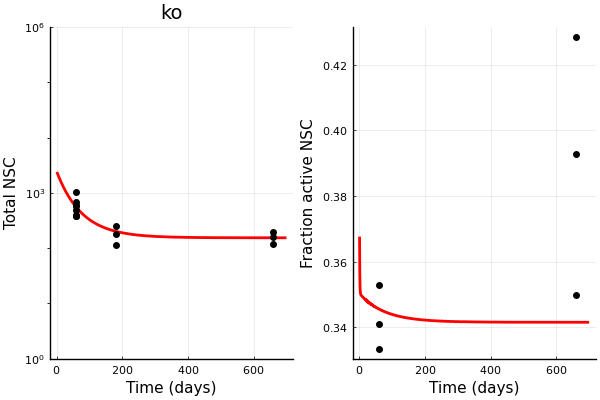

┌ Warning: No strict ticks found
└ @ PlotUtils /home/jooa/.julia/packages/PlotUtils/VgXdq/src/ticks.jl:294


In [16]:
sim = simulate(model, param[:ko]) |> link(model)
ylabs = link_names(model)
p1 = plot(times, sim[:,1], lab="", lc=:red, lw=2, title="ko", yscale=:log10, ylab=ylabs[1])
@df @where(data, :genotype .== "ifnko", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
p2 = plot(times, sim[:,2], lab="", lc=:red, lw=2, ylab=ylabs[2])
@df @where(data, :genotype .== "ifnko", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
plot(p1, p2, xlab="Time (days)")

### Parameters

In [17]:
param_rt = Dict(
    geno => exponential_decay(params[:r₀], params[:βr])
    for (geno, params) in param
)
param_bt = Dict(
    geno => flattening_curve(params[:b₀], params[:βb])
    for (geno, params) in param
)

Dict{Symbol, var"#64#65"{Float64, Float64}} with 2 entries:
  :wt => #64
  :ko => #64

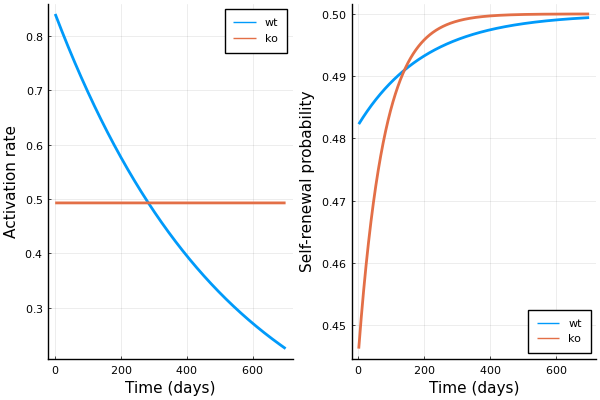

In [18]:
p1 = plot(times, param_rt[:wt], lab="wt", ylab="Activation rate")
plot!(p1, times, param_rt[:ko], lab="ko")
p2 = plot(times, param_bt[:wt], lab="wt", ylab="Self-renewal probability", legend=:bottomright)
plot!(p2, times, param_bt[:ko], lab="ko")
plot(p1, p2, xlab="Time (days)", lw=2)

# Differences from other notebook.

We take the intervention models that we previously built.
Further, we assume that $b$ is a function $\text{NSC}\rightarrow b$ with two parameters, one of which is dependent on genotype.
More specifically,
$$
    b(\text{NSC}) = \frac{1}{1+\left(\frac{K_{ab}}{\text{NSC}}\right)^{n_b}}
$$
Where $K_{ab}$ is the shared half-probability population around 150 stem cells and $n_b$ the genotype dependent shape parameter.

In [19]:
hill(ka, n, x) = 1/(1+(ka/x)^n)
hill(ka, n) = x -> hill(ka, n, x)

hill (generic function with 2 methods)

### A place to store metrics

In [20]:
metrics_neurogen = DataFrame(itime = collect(0:1:660), type="neurogenesis");
metrics_loss = DataFrame(itime = collect(0:1:660), type="aged loss");

# Beta/self model

Takes parameters, outputs simulations.
Plots simulations with datapoints.
Thus needs:

- Data
- Parameters

In this model the effect of interferon is a changed $r'$, as well as a changedl $b_n$. 
This is assuming that in wt:
$$
r'_\text{wt}(t) \neq 0,
$$
i.e. $ \beta_r \neq 0. $
and in ko
$$
r'_\text{ko}(t) = 0,
$$
i.e. $ \beta_r = 0. $

Since $r$ is exponential this means that this model should for some intervention timepoint $t_1$ have a $r$ of the form:
$$
\frac{\text{d}}{\text{d}t}r(t) = 
\begin{cases}
-\beta_r r(t)& \text{if }t<t_1 \\ 
0              & \text{else}
\end{cases}
$$

Thus we have parameters:
$$
\theta = (
    \text{NSC}_0, 
    r_0,
    \beta_r,
    K_{ab},
    n_{b,wt},
    n_{b,ko},
    p_s,
    t_1
)
$$

In [21]:
struct ChangedBetaSelf <: ODEModel
    tspan::Tuple{Float64, Float64}
    times::Vector{Float64}
    values::Vector{Int64}
    fixed::Vector{Pair{Int64, Float64}}
    ChangedBetaSelf(tspan, times, values, fixed::Vector{Pair{I, N}}) where {I <: Integer, N <: Number} = new(tspan, times, values, fixed)
end
function ratefun(model::ChangedBetaSelf)
    function(du, u, p, t)
        _, _, βr, kab_wt, kab_ko, nb_wt, nb_ko, pₛ, t₁ = p
        Q = u[1]; A = u[2]; r = u[3]
        b = 1 - hill(t < t₁ ? kab_wt : kab_ko, 
                     t < t₁ ? nb_wt : nb_ko, 
                     Q+A)
        du[1] = dQ = -r * Q + 2* b * pₛ * A
        du[2] = dA = r * Q - pₛ * A
        if t < t₁
            du[3] = dr = -βr * r
        else
            du[3] = dr = 0
        end
    end
end
function initial(t::ChangedBetaSelf, x::AbstractVector)
    nsc₀, r₀, _, kab_wt, _, nb_wt, _, pₛ, _ = x
    b₀ = hill(kab_wt, nb_wt, 0)
    ratio = sqrt(((pₛ - r₀)/(2*r₀))^2 + (2*b₀*pₛ) / r₀)
    vcat(nsc₀ .* [1-1/(ratio+1), 1/(ratio+1)], [r₀])
end
link(t::ChangedBetaSelf, x::AbstractArray) = hcat(x[:,1] .+ x[:,2], x[:,2] ./ (x[:,1] .+ x[:,2]))
parameter_names(t::Type{ChangedBetaSelf}) = [:nsc₀, :r₀, :βr, :kab_wt, :kab_ko, :nb_wt, :nb_ko, :pₛ, :t₁]
bounds(t::ChangedBetaSelf) = [(100.0, 10000.0), (0.0, 1.0), (0.0, 0.1), (0.0, 1000.0), (0.0, 1000.0), (0.01, 0.1), (0.01, 0.1), (0.0, 1.0), (0.0, 700.0)]
output_names(t::ChangedBetaSelf) = ["qNSC", "aNSC", "r"]
link_names(t::ChangedBetaSelf) = ["Total NSC", "Fraction active NSC"]

link_names (generic function with 3 methods)

## Self-renewal depends on genotype

In [22]:
param_beta = Dict( # from partial cofit
    #:nsc₀ => 1986.0,
    :nsc₀ => 3000.0,
    #:r₀ => 0.8426,
    :r₀ => 0.806991,
    #:βr => 0.001891,
    :βr => 0.00184341,
    :kab_wt => 155.445,
    :kab_ko => 148.364,
    :nb_wt => 0.0399102,
    :nb_ko => 0.0843197,
    :pₛ => 0.95,
)

Dict{Symbol, Float64} with 8 entries:
  :kab_ko => 148.364
  :kab_wt => 155.445
  :nb_ko  => 0.0843197
  :βr     => 0.00184341
  :r₀     => 0.806991
  :nsc₀   => 3000.0
  :nb_wt  => 0.0399102
  :pₛ     => 0.95

In [23]:
times = collect(0:0.1:700.0)
betamodel = ChangedBetaSelf((0.0, 700.0), times, zeros(Int64, length(times)), param_beta)

ChangedBetaSelf((0.0, 700.0), [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9  …  699.1, 699.2, 699.3, 699.4, 699.5, 699.6, 699.7, 699.8, 699.9, 700.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [5 => 148.364, 4 => 155.445, 7 => 0.0843197, 3 => 0.00184341, 2 => 0.806991, 1 => 3000.0, 6 => 0.0399102, 8 => 0.95])

In [24]:
free_parameters(betamodel)

1-element Vector{Symbol}:
 :t₁

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


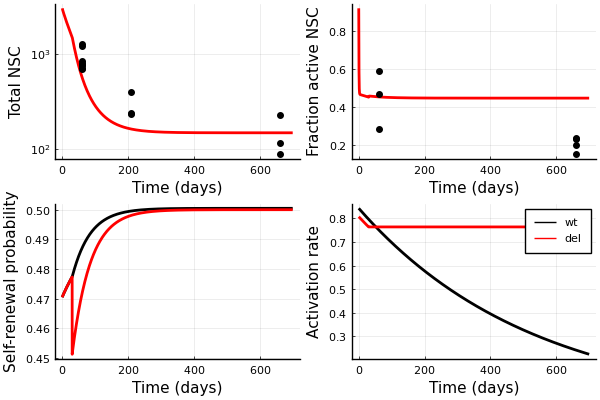

In [25]:
t₁ = 30.0
rawsim = simulate(betamodel, Dict(:t₁ => t₁))
sim = link(betamodel, rawsim)
ylabs = link_names(betamodel)
param = param_beta
hillfun(t₁) = (x, t) -> 1 - hill(t < t₁ ? param[:kab_wt] : param[:kab_ko], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
p1 = plot(times, sim[:,1], lab="", lc=:red, lw=2, yscale=:log10, ylab=ylabs[1])
@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
p2 = plot(times, sim[:,2], lab="", lc=:red, lw=2, ylab=ylabs[2])
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
p3 = plot(times, param_rt[:wt], lab="wt", lc=:black)
plot!(p3, times, rawsim[:,3], lab="del", ylab="Activation rate", lc=:red)
p4 = plot(times, hillfun(800.0).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:black)
plot!(p4, times, hillfun(t₁).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:red)
plot(p1, p2, p4, p3, xlab="Time (days)", lw=2)

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


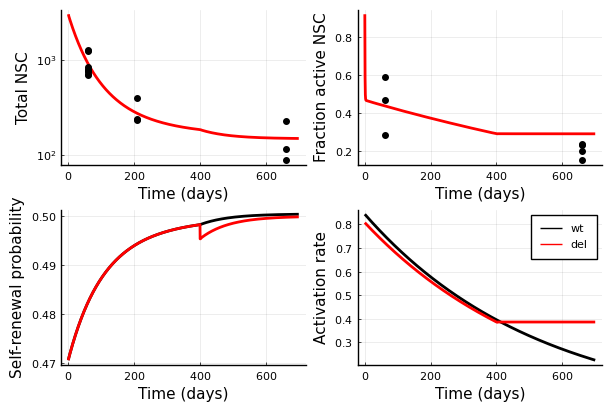

In [26]:
t₁ = 400.0
rawsim = simulate(betamodel, Dict(:t₁ => t₁))
sim = link(betamodel, rawsim)
ylabs = link_names(betamodel)
param = param_beta
hillfun(t₁) = (x, t) -> 1 - hill(t < t₁ ? param[:kab_wt] : param[:kab_ko], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
p1 = plot(times, sim[:,1], lab="", lc=:red, lw=2, yscale=:log10, ylab=ylabs[1])
@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
p2 = plot(times, sim[:,2], lab="", lc=:red, lw=2, ylab=ylabs[2])
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
p3 = plot(times, param_rt[:wt], lab="wt", lc=:black)
plot!(p3, times, rawsim[:,3], lab="del", ylab="Activation rate", lc=:red)
p4 = plot(times, hillfun(800.0).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:black)
plot!(p4, times, hillfun(t₁).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:red)
plot(p1, p2, p4, p3, xlab="Time (days)", lw=2)
#savefig("example_3.svg")
savefig("betamodel_interaction.svg")

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


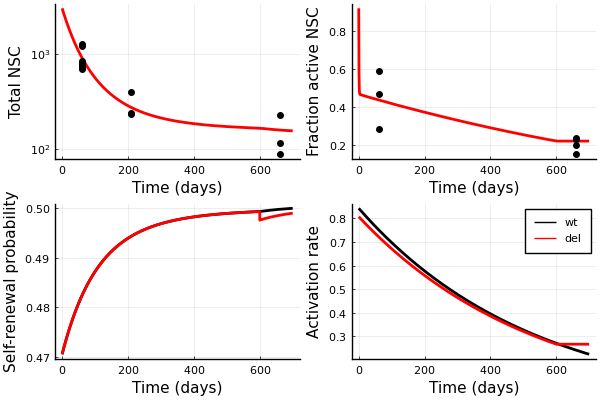

In [27]:
t₁ = 600.0
rawsim = simulate(betamodel, Dict(:t₁ => t₁))
sim = link(betamodel, rawsim)
ylabs = link_names(betamodel)
param = param_beta
hillfun(t₁) = (x, t) -> 1 - hill(t < t₁ ? param[:kab_wt] : param[:kab_ko], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
p1 = plot(times, sim[:,1], lab="", lc=:red, lw=2, yscale=:log10, ylab=ylabs[1])
@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
p2 = plot(times, sim[:,2], lab="", lc=:red, lw=2, ylab=ylabs[2])
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
p3 = plot(times, param_rt[:wt], lab="wt", lc=:black)
plot!(p3, times, rawsim[:,3], lab="del", ylab="Activation rate", lc=:red)
p4 = plot(times, hillfun(800.0).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:black)
plot!(p4, times, hillfun(t₁).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:red)
plot(p1, p2, p4, p3, xlab="Time (days)", lw=2)

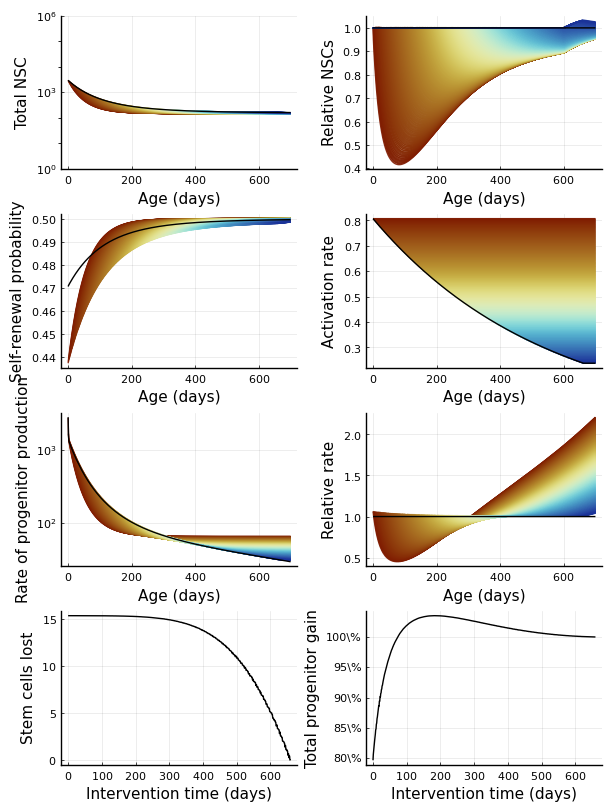

┌ Warning: No strict ticks found
└ @ PlotUtils /home/jooa/.julia/packages/PlotUtils/VgXdq/src/ticks.jl:294


"sims/freeze_activation_individual_self_absolute_neurogen.csv"

In [28]:
#pgfplots()
pyplot()
itimes = collect(0:1:660)
rawsim = simulate(betamodel, Dict(:t₁ => 800.0)) # No intervention model
nonsim = link(betamodel, rawsim)
ylabs = link_names(betamodel)
param = param_beta
hillfun(t₁) = (x, t) -> 1 - hill(t < t₁ ? param[:kab_wt] : param[:kab_ko], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
# Plot base simulation (wt)
p1 = plot(yscale=:log10, ylab=ylabs[1], xlab="Age (days)")
p2 = plot(ylab="Relative NSCs", xlab="Age (days)")
p3 = plot(xlab="Age (days)", ylab="Activation rate")
p4 = plot(xlab="Age (days)",  ylab="Self-renewal probability", legend=:bottomright)
# ???
neurogen_wt = 2 .* 0.95 .* (1 .- hillfun(800.0).(sim[:,1], times)) .* rawsim[:,2]
tot = 2 .* 0.95 .* (1 .- hillfun(800.0).(sim[:,1], times)) .* rawsim[:,2]
tot_wt = sim[:,1]
tot_rel = DataFrame(:t => times, :wt => tot_wt ./ tot_wt)
neurogen_rel = DataFrame(:t => times, :wt => neurogen_wt ./ neurogen_wt)
tot_abs = DataFrame(:t => times, :wt => tot_wt)
neurogen_abs = DataFrame(:t => times, :wt => neurogen_wt)
p5 = plot(yscale=:log10, ylab="Rate of progenitor production", xlab="Age (days)")
p6 = plot(ylab="Relative rate", xlab="Age (days)")
# Plot interventions
colours = cgrad(:roma, length(itimes), categorical=true, rev=false)
# Compute some things
step = times[2] - times[1]
non_neurogen = step .* neurogen_wt
# Preallocate vectors
loss = zeros(Float64, length(itimes))
total_neurogen = zeros(Float64, length(itimes))
for (i, itime) in enumerate(itimes)
    rawsim = simulate(betamodel, Dict(:t₁ => Float64(itime)))
    changed = times .> itime
    sim = link(betamodel, rawsim)
    loss[i] = nonsim[findfirst(times .== 660.0), 1] .- sim[findfirst(times .== 660.0),1]
    neurogen = 2 .* 0.95 .* (1 .- hillfun(itime).(sim[:,1], times)) .* rawsim[:,2]
    total_neurogen[i] = sum(neurogen .* step) ./ sum(non_neurogen)
    plot!(p1, times[changed], sim[changed,1], lab="", lc=colours[i], la=0.9)
    plot!(p2, times, sim[:,1] ./ tot_wt, lab="", lc=colours[i], la=0.9)
    plot!(p3, times[changed], rawsim[changed,3], lab="", lc=colours[i], la=0.9)
    plot!(p4, times[changed], hillfun(itime).(sim[changed,1], times[changed]), lab="", lc=colours[i], la=0.9)
    plot!(p5, times[changed], neurogen[changed], lab="", lc=colours[i], la=0.9)
    plot!(p6, times[changed], neurogen[changed] ./ neurogen_wt[changed], lab="", lc=colours[i], la=0.9)
    tot_rel[!,"d$(Int64(round(itime)))"] = sim[:,1] ./ tot_wt
    neurogen_rel[!,"d$(Int64(round(itime)))"] = neurogen ./ neurogen_wt
    tot_abs[!,"d$(Int64(round(itime)))"] = sim[:,1]
    neurogen_abs[!,"d$(Int64(round(itime)))"] = neurogen
end
# Plot previous simulation
plot!(p1, times, nonsim[:,1], lab="", lc=:black, lw=2)
plot!(p2, times, nonsim[:,1] ./ nonsim[:,1], lab="", lc=:black, lw=2)
plot!(p3, times, rawsim[:,3], lab="", lc=:black, lw=2)
plot!(p4, times, hillfun(800.0).(nonsim[:,1], times), lab="", lc=:black, lw=2)
plot!(p5, times, neurogen_wt, lc=:black, lw=2, lab="")
plot!(p6, times, neurogen_wt ./ neurogen_wt, lc=:black, lw=2, lab="")
# Plot data
#@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
#@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
# Plot metrics
p7 = plot(itimes, loss, lab="", ylab="Stem cells lost", xlab="Intervention time (days)", lc=:black)
steps = round(minimum(total_neurogen); sigdigits=1):0.05:round(maximum(total_neurogen); sigdigits=1)
p8 = plot(itimes, total_neurogen, lc=:black, lab="", ylab="Total progenitor gain", xlab = "Intervention time (days)",
          ytick=(collect(steps), ["$(Int64(100*x))\\%" for x in steps]))
#p7 = plot(itimes, total_neurogen)
l = @layout [
    p1 p2;
    p3 p4;
    p5 p6;
    p7 p8;
]
plot(p1, p2, p4, p3, p5, p6, p7, p8, lw=1, layout=l, size=(600, 800))
#savefig("freeze_activation_individual_self.tex")
savefig("freeze_activation_individual_self.svg")
tot_rel |> CSV.write("sims/freeze_activation_individual_self_relative_nsc.csv")
neurogen_rel |> CSV.write("sims/freeze_activation_individual_self_relative_neurogen.csv")
tot_abs |> CSV.write("sims/freeze_activation_individual_self_absolute_nsc.csv")
neurogen_abs |> CSV.write("sims/freeze_activation_individual_self_absolute_neurogen.csv")

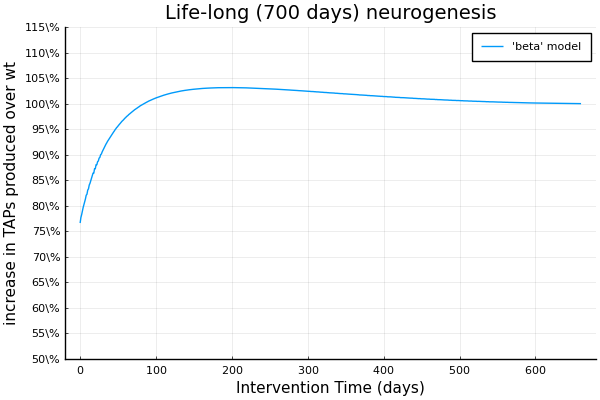

In [29]:
itimes = metrics_loss.itime
int_neurogenesis_1 = zeros(Float64, length(itimes))
#int_neurogenesis_2 = zeros(Float64, length(itimes))
int_neurogenesis_wt = zeros(Float64, length(itimes))
step = times[2] - times[1]
hillfun(t₁) = (x, t) -> 1 - hill(t < t₁ ? param[:kab_wt] : param[:kab_ko], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
for (i, t₁) in enumerate(itimes)
    rawsim = simulate(betamodel, Dict(:t₁ => Float64(t₁)))
    int_neurogenesis_1[i] = sum(rawsim[:,2] .* 2 .* 0.95 .* (1 .- hillfun(t₁).(rawsim[:,1], times)))
    #rawsim = simulate(betamodel, Dict(:t₁ => Float64(t₁)))
    #int_neurogenesis_2[i] = sum(rawsim[:,2] .* 2 .* 0.95 .* (1 .- param_bt[:wt].(times)))
    rawsim = simulate(betamodel, Dict(:t₁ => Float64(700)))
    int_neurogenesis_wt[i] = sum(rawsim[:,2] .* 2 .* 0.95 .* (1 .- hillfun(t₁).(rawsim[:,1], times)))
end
yticks = 50:5:115
plot(xlab="Intervention Time (days)", ylab="increase in TAPs produced over wt", title="Life-long (700 days) neurogenesis", yticks=(collect(yticks), ["$x\\%" for x in yticks]))
metrics_neurogen[!,"beta_fullself"] = int_neurogenesis_1 ./ int_neurogenesis_wt
plot!(itimes, int_neurogenesis_1 ./ int_neurogenesis_wt .* 100, lab="'beta' model")
#plot!(itimes, int_neurogenesis_2 ./ int_neurogenesis_wt .* 100, lab="'value' model")
#plot!(itimes, int_neurogenesis_wt .* step, lab="wt", lc=:gray)

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


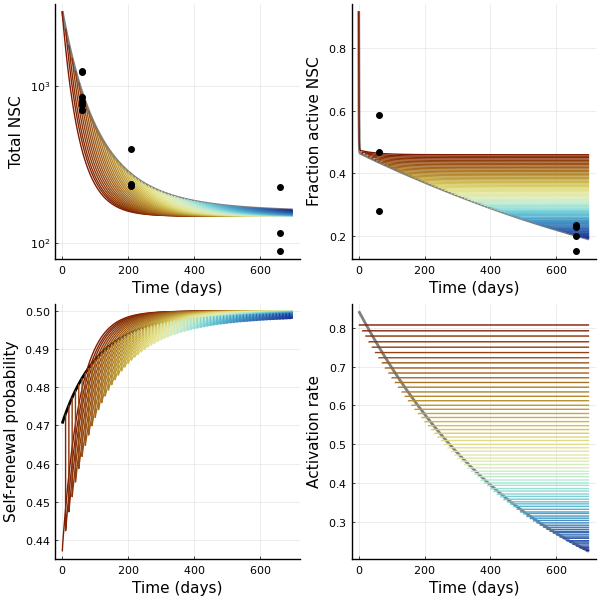

In [30]:
itimes = collect(0:10:699)#[100, 200]#, 60, 100, 300, 600]
colours = cgrad(:roma, length(itimes), categorical=true, rev=false)
rawsim = simulate(betamodel, Dict(:t₁ => 700.0))
sim = link(betamodel, rawsim)
ylabs = link_names(betamodel)
p1 = plot(times, sim[:,1], lab="", lc=:gray, lw=2, yscale=:log10, ylab=ylabs[1])
p2 = plot(times, sim[:,2], lab="", lc=:gray, lw=2, ylab=ylabs[2])
p3 = plot(times, param_rt[:wt], lab="", ylab="Activation rate", lc=:gray, lw=2)
#p4 = plot(times, param_bt[:wt], lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:black, lw=2)
p4 = plot(times, hillfun(800).(sim[:,1], times), lab="", 
          ylab="Self-renewal probability", legend=:bottomright, lc=:black, lw=2)
for (i, t₁) in enumerate(itimes)
    step = times[2] - times[1]
    rawsim = simulate(betamodel, Dict(:t₁ => Float64(t₁)))
    sim = link(betamodel, rawsim)
    has_changed = times .> t₁
    has_changed[max(1, findfirst(has_changed)-2):end] .= true
    plot!(p1, times[has_changed], sim[has_changed,1], lab="", lw=1, lc=colours[i]) #t₁=$t₁
    plot!(p2, times[has_changed], sim[has_changed,2], lab="", lw=1, lc=colours[i])
    plot!(p3, times[has_changed], rawsim[has_changed,3], lab="", lw=1, lc=colours[i])
    plot!(p4, times[has_changed], hillfun(t₁).(sim[:,1], times)[has_changed], lab="", lw=1, lc=colours[i])
end
#plot!(p1, times, sim[:,1], lab="", lc=:red, lw=2)
@df @where(data, :genotype .== "wt", :name .== "total")  scatter!(p1, :age, :value, mc=:black, lab="")
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
plot(p1, p2, p4, p3, xlab="Time (days)", size=(600, 600))

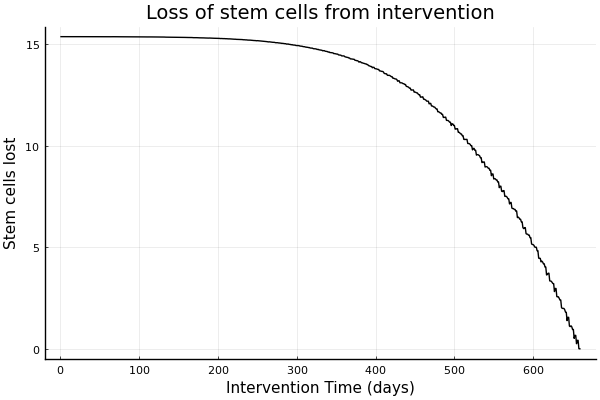

In [31]:
#itimes = collect(0:1:660)#[100, 200]#, 60, 100, 300, 600]
itimes = metrics_loss.itime
rawsim = simulate(betamodel, Dict(:t₁ => 700.0))
regsim = link(betamodel, rawsim)
nsc660 = regsim[times .== 660.0, 1][1]
nscs = map(itimes) do t₁
    rawsim = simulate(betamodel, Dict(:t₁ => t₁))
    regsim = link(betamodel, rawsim)
    nsc660 .- regsim[times .== 660.0, 1][1]
end
metrics_loss[!,"beta_fullself"] = nscs
plot(itimes, nscs, lc=:black, lab="", xlab="Intervention Time (days)", ylab="Stem cells lost", title="Loss of stem cells from intervention")

In [32]:
metrics_loss

661×3 DataFrame
 Row │ itime  type       beta_fullself 
     │ Int64  String     Float64       
─────┼─────────────────────────────────
   1 │     0  aged loss    15.3519
   2 │     1  aged loss    15.3514
   3 │     2  aged loss    15.3514
   4 │     3  aged loss    15.3517
   5 │     4  aged loss    15.3517
   6 │     5  aged loss    15.3518
   7 │     6  aged loss    15.3519
   8 │     7  aged loss    15.3514
   9 │     8  aged loss    15.3515
  10 │     9  aged loss    15.3518
  11 │    10  aged loss    15.351
  ⋮  │   ⋮        ⋮            ⋮
 652 │   651  aged loss     0.973749
 653 │   652  aged loss     0.535808
 654 │   653  aged loss     0.681903
 655 │   654  aged loss     0.681903
 656 │   655  aged loss     0.272889
 657 │   656  aged loss     0.438631
 658 │   657  aged loss     0.438631
 659 │   658  aged loss     0.0287224
 660 │   659  aged loss     0.0287224
 661 │   660  aged loss     8.23786e-5
                       640 rows omitted

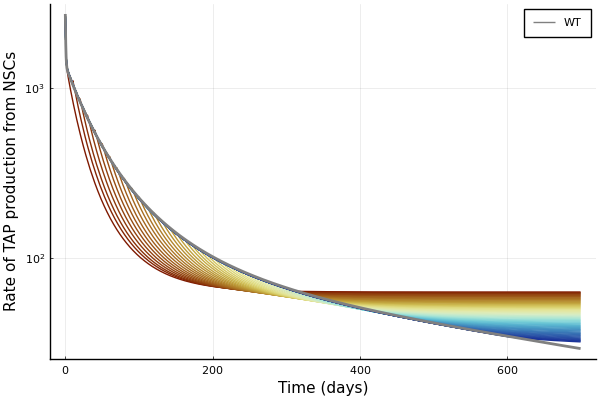

In [33]:
itimes = collect(0:10:600)#[100, 200]#, 60, 100, 300, 600]
colours = cgrad(:roma, length(itimes), categorical=true, rev=false)
rawsim = simulate(betamodel, Dict(:t₁ => 700.0))
sim = link(betamodel, rawsim)
p = plot(xlab="Time (days)", ylab="Rate of TAP production from NSCs", yscale=:log10)
hillfun(t₁) = (x, t) -> 1 - hill(t < t₁ ? param[:kab_wt] : param[:kab_ko], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
for (i, t₁) in enumerate(itimes)
    rawsim = simulate(betamodel, Dict(:t₁ => Float64(t₁)))
    #has_changed = times .> t₁
    plot!(p, times, rawsim[:,2] .* 2 .* 0.95 .* (1 .- hillfun(t₁).(rawsim[:,1], times)), lab="", lc=colours[i])
end
rawsim = simulate(betamodel, Dict(:t₁ => Float64(700)))
plot!(p, times, rawsim[:,2] .* 2 .* 0.95 .* (1 .- param_bt[:wt].(times)), lab="WT", lc=:gray, lw=2)
#plot!(p, sim_ifnko_both.t, sim_ifnko_both.active .* sim_ifnko_both.counts .* sim_ifnko_both.b .* 2 .* 0.95, lab="KO", lc=:red, lw=2)
p
#savefig("plots/scenario1-lifelong-neurogenesis.svg")

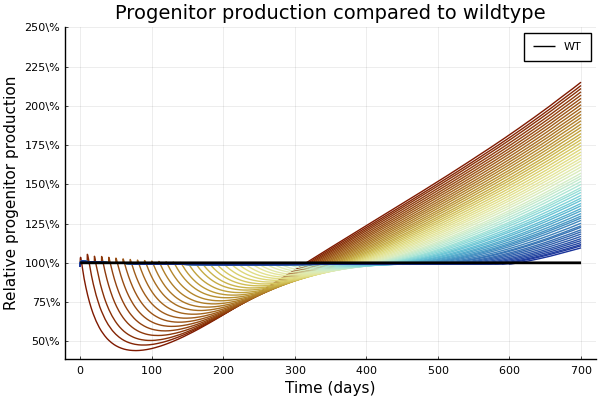

In [34]:
itimes = collect(0:10:600)#[100, 200]#, 60, 100, 300, 600]
colours = cgrad(:roma, length(itimes), categorical=true, rev=false)
rawsim = simulate(betamodel, Dict(:t₁ => 700.0))
sim = link(betamodel, rawsim)
p = plot(xlab="Time (days)", ylab="Relative progenitor production", title="Progenitor production compared to wildtype")#, yscale=:log10)
hillfun(t₁) = (x, t) -> 1 - hill(t < t₁ ? param[:kab_wt] : param[:kab_ko], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
rawsim = simulate(betamodel, Dict(:t₁ => Float64(700)))
neurogen = rawsim[:,2] .* 2 .* 0.95 .* (1 .- param_bt[:wt].(times))
for (i, t₁) in enumerate(itimes)
    rawsim = simulate(betamodel, Dict(:t₁ => Float64(t₁)))
    #has_changed = times .> t₁
    plot!(p, times, rawsim[:,2] .* 2 .* 0.95 .* (1 .- hillfun(t₁).(rawsim[:,1], times)) ./ neurogen, lab="", lc=colours[i], cbar=true)
end
rawsim = simulate(betamodel, Dict(:t₁ => Float64(700)))
plot!(p, times, rawsim[:,2] .* 2 .* 0.95 .* (1 .- param_bt[:wt].(times)) ./ neurogen, lab="WT", lc=:black, lw=2,
      yticks=(0.5:0.25:2.5, ["$(Int64(round(x*100)))\\%" for x in 0.5:0.25:2.5]),
      xticks=(0:100:700)
)
#plot!(p, sim_ifnko_both.t, sim_ifnko_both.active .* sim_ifnko_both.counts .* sim_ifnko_both.b .* 2 .* 0.95, lab="KO", lc=:red, lw=2)
p
#savefig("plots/scenario1-lifelong-neurogenesis.svg")

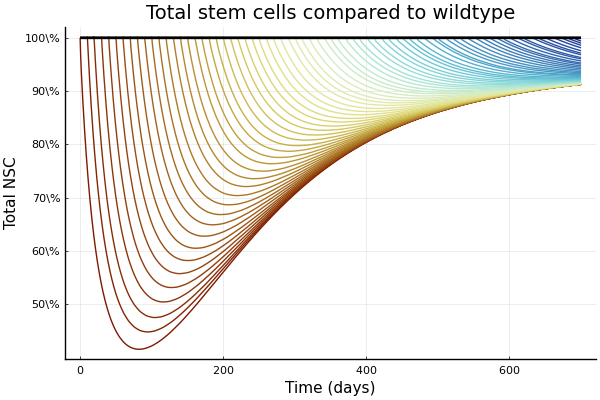

In [35]:
itimes = collect(0:10:699)#[100, 200]#, 60, 100, 300, 600]
colours = cgrad(:roma, length(itimes), categorical=true, rev=false)
rawsim = simulate(betamodel, Dict(:t₁ => 700.0))
sim = link(betamodel, rawsim)
tot = sim[:,1]
ylabs = link_names(betamodel)
p1 = plot(lab="", lc=:gray, lw=2, ylab=ylabs[1], xlab="Time (days)", title="Total stem cells compared to wildtype")
for (i, t₁) in enumerate(itimes)
    step = times[2] - times[1]
    rawsim = simulate(betamodel, Dict(:t₁ => Float64(t₁)))
    sim = link(betamodel, rawsim)
    plot!(p1, times, sim[:,1] ./ tot, lab="", lw=1, lc=colours[i]) #t₁=$t₁
end
plot!(p1, times, tot ./ tot, lab="", lc=:black, lw=2,
    yticks=(0.5:0.1:1.0, ["$(Int64(x*100))\\%" for x in 0.5:0.1:1.0])
)
#@df @where(data, :genotype .== "wt", :name .== "total")  scatter!(p1, :age, :value, mc=:black, lab="")
p1

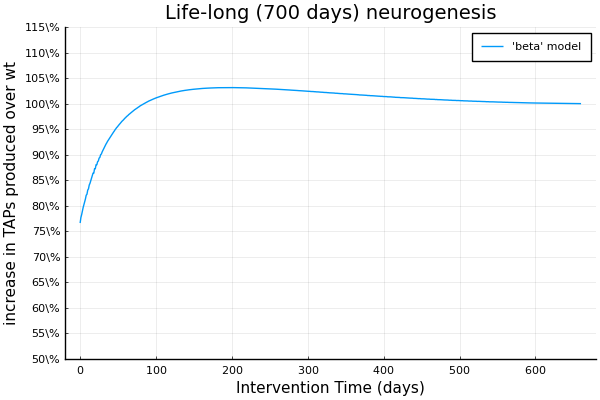

In [36]:
itimes = metrics_loss.itime
int_neurogenesis_1 = zeros(Float64, length(itimes))
#int_neurogenesis_2 = zeros(Float64, length(itimes))
int_neurogenesis_wt = zeros(Float64, length(itimes))
step = times[2] - times[1]
hillfun(t₁) = (x, t) -> 1 - hill(t < t₁ ? param[:kab_wt] : param[:kab_ko], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
for (i, t₁) in enumerate(itimes)
    rawsim = simulate(betamodel, Dict(:t₁ => Float64(t₁)))
    int_neurogenesis_1[i] = sum(rawsim[:,2] .* 2 .* 0.95 .* (1 .- hillfun(t₁).(rawsim[:,1], times)))
    #rawsim = simulate(betamodel, Dict(:t₁ => Float64(t₁)))
    #int_neurogenesis_2[i] = sum(rawsim[:,2] .* 2 .* 0.95 .* (1 .- param_bt[:wt].(times)))
    rawsim = simulate(betamodel, Dict(:t₁ => Float64(700)))
    int_neurogenesis_wt[i] = sum(rawsim[:,2] .* 2 .* 0.95 .* (1 .- hillfun(t₁).(rawsim[:,1], times)))
end
yticks = 50:5:115
plot(xlab="Intervention Time (days)", ylab="increase in TAPs produced over wt", title="Life-long (700 days) neurogenesis", yticks=(collect(yticks), ["$x\\%" for x in yticks]))
metrics_neurogen[!,"beta_fullself"] = int_neurogenesis_1 ./ int_neurogenesis_wt
plot!(itimes, int_neurogenesis_1 ./ int_neurogenesis_wt .* 100, lab="'beta' model")
#plot!(itimes, int_neurogenesis_2 ./ int_neurogenesis_wt .* 100, lab="'value' model")
#plot!(itimes, int_neurogenesis_wt .* step, lab="wt", lc=:gray)

## Self-renewal is partially genotype dependent

In [37]:
param_beta = Dict( # from cofit
    #:nsc₀ => 1986.0,
    :nsc₀ => 3000.0,
    #:r₀ => 0.8426,
    :r₀ => 0.839538,
    #:βr => 0.001891,
    :βr => 0.00188605,
    :kab_wt => 153.81,
    :kab_ko => 153.81,
    :nb_wt => 0.039907,
    :nb_ko => 0.0841552,
    :pₛ => 0.95,
)

Dict{Symbol, Float64} with 8 entries:
  :kab_ko => 153.81
  :kab_wt => 153.81
  :nb_ko  => 0.0841552
  :βr     => 0.00188605
  :r₀     => 0.839538
  :nsc₀   => 3000.0
  :nb_wt  => 0.039907
  :pₛ     => 0.95

In [38]:
times = collect(0:1:700.0)
betamodel = ChangedBetaSelf((0.0, 700.0), times, zeros(Int64, length(times)), param_beta)

ChangedBetaSelf((0.0, 700.0), [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0  …  691.0, 692.0, 693.0, 694.0, 695.0, 696.0, 697.0, 698.0, 699.0, 700.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [5 => 153.81, 4 => 153.81, 7 => 0.0841552, 3 => 0.00188605, 2 => 0.839538, 1 => 3000.0, 6 => 0.039907, 8 => 0.95])

In [39]:
free_parameters(betamodel)

1-element Vector{Symbol}:
 :t₁

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


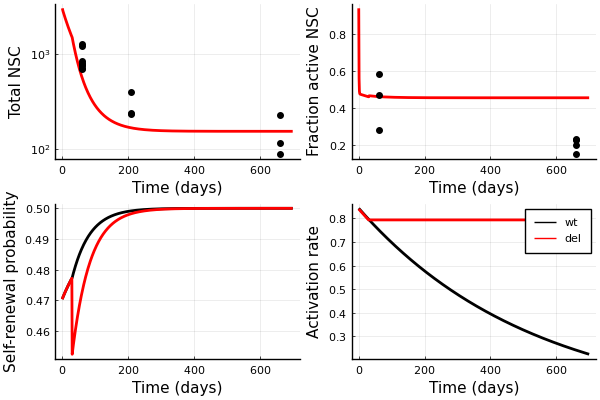

In [40]:
t₁ = 30.0
rawsim = simulate(betamodel, Dict(:t₁ => t₁))
sim = link(betamodel, rawsim)
ylabs = link_names(betamodel)
param = param_beta
hillfun(t₁) = (x, t) -> 1 - hill(param[:kab_wt], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
p1 = plot(times, sim[:,1], lab="", lc=:red, lw=2, yscale=:log10, ylab=ylabs[1])
@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
p2 = plot(times, sim[:,2], lab="", lc=:red, lw=2, ylab=ylabs[2])
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
p3 = plot(times, param_rt[:wt], lab="wt", lc=:black)
plot!(p3, times, rawsim[:,3], lab="del", ylab="Activation rate", lc=:red)
p4 = plot(times, hillfun(800.0).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:black)
plot!(p4, times, hillfun(t₁).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:red)
plot(p1, p2, p4, p3, xlab="Time (days)", lw=2)

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


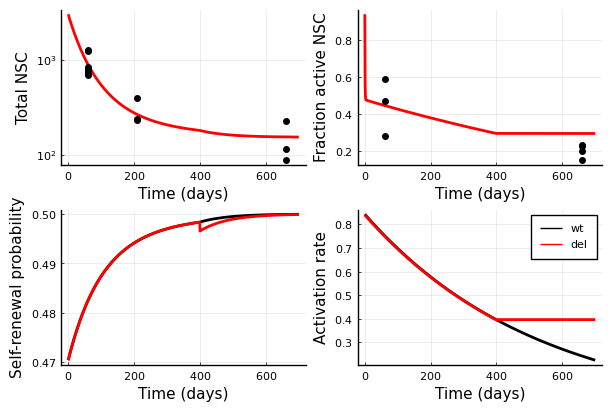

In [41]:
t₁ = 400.0
rawsim = simulate(betamodel, Dict(:t₁ => t₁))
sim = link(betamodel, rawsim)
ylabs = link_names(betamodel)
param = param_beta
hillfun(t₁) = (x, t) -> 1 - hill(param[:kab_wt], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
p1 = plot(times, sim[:,1], lab="", lc=:red, lw=2, yscale=:log10, ylab=ylabs[1])
@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
p2 = plot(times, sim[:,2], lab="", lc=:red, lw=2, ylab=ylabs[2])
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
p3 = plot(times, param_rt[:wt], lab="wt", lc=:black)
plot!(p3, times, rawsim[:,3], lab="del", ylab="Activation rate", lc=:red)
p4 = plot(times, hillfun(800.0).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:black)
plot!(p4, times, hillfun(t₁).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:red)
plot(p1, p2, p4, p3, xlab="Time (days)", lw=2)
savefig("betamodel_static.svg")

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


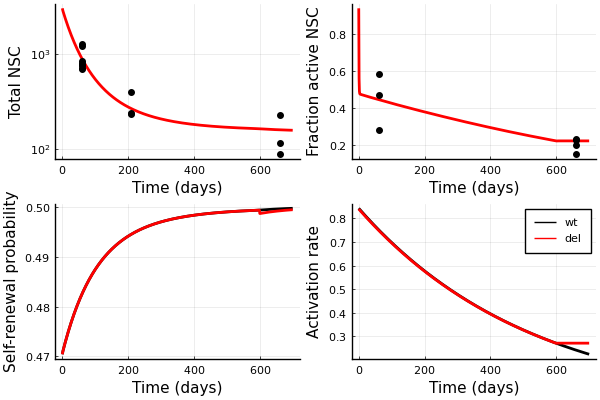

In [42]:
t₁ = 600.0
rawsim = simulate(betamodel, Dict(:t₁ => t₁))
sim = link(betamodel, rawsim)
ylabs = link_names(betamodel)
param = param_beta
hillfun(t₁) = (x, t) -> 1 - hill(param[:kab_wt], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
p1 = plot(times, sim[:,1], lab="", lc=:red, lw=2, yscale=:log10, ylab=ylabs[1])
@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
p2 = plot(times, sim[:,2], lab="", lc=:red, lw=2, ylab=ylabs[2])
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
p3 = plot(times, param_rt[:wt], lab="wt", lc=:black)
plot!(p3, times, rawsim[:,3], lab="del", ylab="Activation rate", lc=:red)
p4 = plot(times, hillfun(800.0).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:black)
plot!(p4, times, hillfun(t₁).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:red)
plot(p1, p2, p4, p3, xlab="Time (days)", lw=2)

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


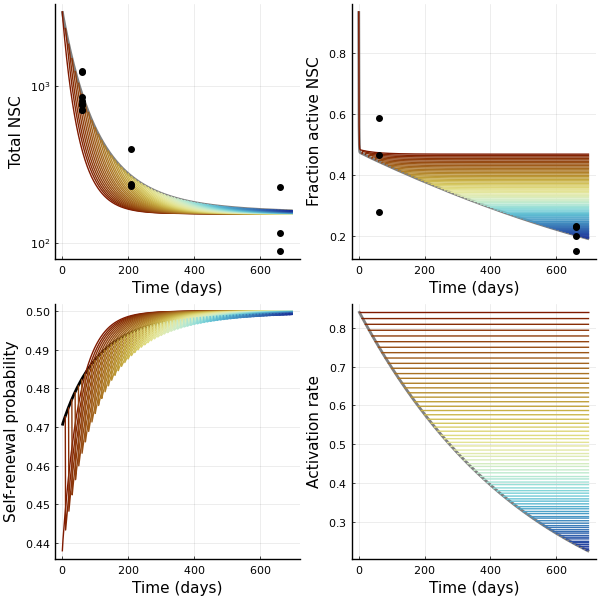

In [43]:
itimes = collect(0:10:699)#[100, 200]#, 60, 100, 300, 600]
colours = cgrad(:roma, length(itimes), categorical=true, rev=false)
rawsim = simulate(betamodel, Dict(:t₁ => 700.0))
sim = link(betamodel, rawsim)
ylabs = link_names(betamodel)
p1 = plot(times, sim[:,1], lab="", lc=:gray, lw=2, yscale=:log10, ylab=ylabs[1])
p2 = plot(times, sim[:,2], lab="", lc=:gray, lw=2, ylab=ylabs[2])
p3 = plot(times, param_rt[:wt], lab="", ylab="Activation rate", lc=:gray, lw=2)
#p4 = plot(times, param_bt[:wt], lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:black, lw=2)
p4 = plot(times, hillfun(800).(sim[:,1], times), lab="", 
          ylab="Self-renewal probability", legend=:bottomright, lc=:black, lw=2)
for (i, t₁) in enumerate(itimes)
    rawsim = simulate(betamodel, Dict(:t₁ => Float64(t₁)))
    sim = link(betamodel, rawsim)
    has_changed = times .> t₁
    has_changed[max(1, findfirst(has_changed)-2):end] .= true
    plot!(p1, times[has_changed], sim[has_changed,1], lab="", lw=1, lc=colours[i]) #t₁=$t₁
    plot!(p2, times[has_changed], sim[has_changed,2], lab="", lw=1, lc=colours[i])
    plot!(p3, times[has_changed], rawsim[has_changed,3], lab="", lw=1, lc=colours[i])
    plot!(p4, times[has_changed], hillfun(t₁).(sim[:,1], times)[has_changed], lab="", lw=1, lc=colours[i])
end
#plot!(p1, times, sim[:,1], lab="", lc=:red, lw=2)
@df @where(data, :genotype .== "wt", :name .== "total")  scatter!(p1, :age, :value, mc=:black, lab="")
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
plot(p1, p2, p4, p3, xlab="Time (days)", size=(600, 600))

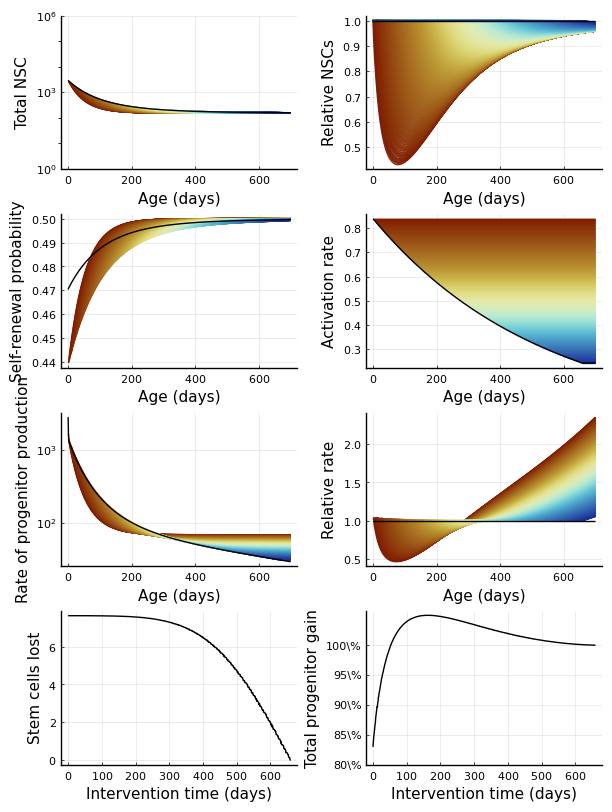

┌ Warning: No strict ticks found
└ @ PlotUtils /home/jooa/.julia/packages/PlotUtils/VgXdq/src/ticks.jl:294


"sims/freeze_activation_semishared_self_absolute_neurogen.csv"

In [44]:
#pgfplots()
pyplot()
itimes = collect(0:1:660)
rawsim = simulate(betamodel, Dict(:t₁ => 800.0)) # No intervention model
nonsim = link(betamodel, rawsim)
sim = nonsim
ylabs = link_names(betamodel)
param = param_beta
hillfun(t₁) = (x, t) -> 1 - hill(t < t₁ ? param[:kab_wt] : param[:kab_ko], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
# Plot base simulation (wt)
p1 = plot(yscale=:log10, ylab=ylabs[1], xlab="Age (days)")
p2 = plot(ylab="Relative NSCs", xlab="Age (days)")
p3 = plot(xlab="Age (days)", ylab="Activation rate")
p4 = plot(xlab="Age (days)",  ylab="Self-renewal probability", legend=:bottomright)
# ???
neurogen_wt = 2 .* 0.95 .* (1 .- hillfun(800.0).(sim[:,1], times)) .* rawsim[:,2]
tot = 2 .* 0.95 .* (1 .- hillfun(800.0).(sim[:,1], times)) .* rawsim[:,2]
tot_wt = sim[:,1]
tot_rel = DataFrame(:t => times, :wt => tot_wt ./ tot_wt)
neurogen_rel = DataFrame(:t => times, :wt => neurogen_wt ./ neurogen_wt)
tot_abs = DataFrame(:t => times, :wt => tot_wt)
neurogen_abs = DataFrame(:t => times, :wt => neurogen_wt)
p5 = plot(yscale=:log10, ylab="Rate of progenitor production", xlab="Age (days)")
p6 = plot(ylab="Relative rate", xlab="Age (days)")
# Plot interventions
colours = cgrad(:roma, length(itimes), categorical=true, rev=false)
# Compute some things
step = times[2] - times[1]
non_neurogen = step .* neurogen_wt
# Preallocate vectors
loss = zeros(Float64, length(itimes))
total_neurogen = zeros(Float64, length(itimes))
for (i, itime) in enumerate(itimes)
    rawsim = simulate(betamodel, Dict(:t₁ => Float64(itime)))
    changed = times .> itime
    sim = link(betamodel, rawsim)
    loss[i] = nonsim[findfirst(times .== 660.0), 1] .- sim[findfirst(times .== 660.0),1]
    neurogen = 2 .* 0.95 .* (1 .- hillfun(itime).(sim[:,1], times)) .* rawsim[:,2]
    total_neurogen[i] = sum(neurogen .* step) ./ sum(non_neurogen)
    plot!(p1, times[changed], sim[changed,1], lab="", lc=colours[i], la=0.9)
    plot!(p2, times, sim[:,1] ./ tot_wt, lab="", lc=colours[i], la=0.9)
    plot!(p3, times[changed], rawsim[changed,3], lab="", lc=colours[i], la=0.9)
    plot!(p4, times[changed], hillfun(itime).(sim[changed,1], times[changed]), lab="", lc=colours[i], la=0.9)
    plot!(p5, times[changed], neurogen[changed], lab="", lc=colours[i], la=0.9)
    plot!(p6, times[changed], neurogen[changed] ./ neurogen_wt[changed], lab="", lc=colours[i], la=0.9)
    tot_rel[!,"d$(Int64(round(itime)))"] = sim[:,1] ./ tot_wt
    neurogen_rel[!,"d$(Int64(round(itime)))"] = neurogen ./ neurogen_wt
    tot_abs[!,"d$(Int64(round(itime)))"] = sim[:,1]
    neurogen_abs[!,"d$(Int64(round(itime)))"] = neurogen
end
# Plot previous simulation
plot!(p1, times, nonsim[:,1], lab="", lc=:black, lw=2)
plot!(p2, times, nonsim[:,1] ./ nonsim[:,1], lab="", lc=:black, lw=2)
plot!(p3, times, rawsim[:,3], lab="", lc=:black, lw=2)
plot!(p4, times, hillfun(800.0).(nonsim[:,1], times), lab="", lc=:black, lw=2)
plot!(p5, times, neurogen_wt, lc=:black, lw=2, lab="")
plot!(p6, times, neurogen_wt ./ neurogen_wt, lc=:black, lw=2, lab="")
# Plot data
#@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
#@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
# Plot metrics
p7 = plot(itimes, loss, lab="", ylab="Stem cells lost", xlab="Intervention time (days)", lc=:black)
steps = round(minimum(total_neurogen); sigdigits=1):0.05:round(maximum(total_neurogen); sigdigits=1)
p8 = plot(itimes, total_neurogen, lc=:black, lab="", ylab="Total progenitor gain", xlab = "Intervention time (days)",
          ytick=(collect(steps), ["$(Int64(100*x))\\%" for x in steps]))
#p7 = plot(itimes, total_neurogen)
l = @layout [
    p1 p2;
    p3 p4;
    p5 p6;
    p7 p8;
]
plot(p1, p2, p4, p3, p5, p6, p7, p8, lw=1, layout=l, size=(600, 800))
#savefig("freeze_activation_semishared_self.tex")
savefig("freeze_activation_semishared_self.svg")
tot_rel |> CSV.write("sims/freeze_activation_semishared_self_relative_nsc.csv")
neurogen_rel |> CSV.write("sims/freeze_activation_semishared_self_relative_neurogen.csv")
tot_abs |> CSV.write("sims/freeze_activation_semishared_self_absolute_nsc.csv")
neurogen_abs |> CSV.write("sims/freeze_activation_semishared_self_absolute_neurogen.csv")

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


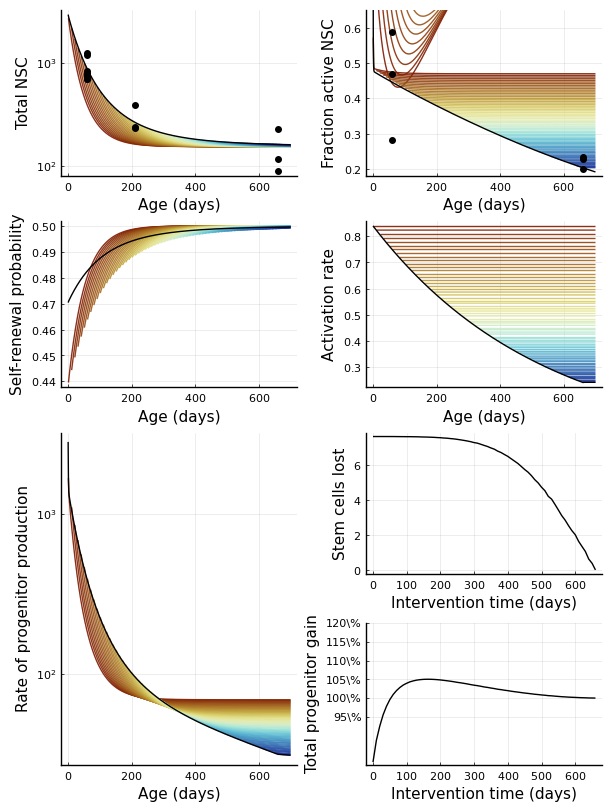

In [45]:
#pgfplots()
pyplot()
rawsim = simulate(betamodel, Dict(:t₁ => 800.0)) # No intervention model
itimes = collect(0:10:660)
nonsim = link(betamodel, rawsim)
ylabs = link_names(betamodel)
param = param_beta
hillfun(t₁) = (x, t) -> 1 - hill(param[:kab_wt], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
# Plot base simulation (wt)
p1 = plot(yscale=:log10, ylab=ylabs[1], xlab="Age (days)")
p2 = plot(ylab=ylabs[2], xlab="Age (days)", ylim=(0.18, 0.65))
p3 = plot(xlab="Age (days)", ylab="Activation rate")
p4 = plot(xlab="Age (days)",  ylab="Self-renewal probability", legend=:bottomright)
neurogen_wt = 2 .* 0.95 .* (1 .- hillfun(800.0).(sim[:,1], times)) .* rawsim[:,2]
tot = 2 .* 0.95 .* (1 .- hillfun(800.0).(sim[:,1], times)) .* rawsim[:,2]
tot_wt = sim[:,1]
tot_rel = DataFrame(:t => times, :wt => tot_wt ./ tot_wt)
neurogen_rel = DataFrame(:t => times, :wt => neurogen_wt ./ neurogen_wt)
tot_abs = DataFrame(:t => times, :wt => tot_wt)
neurogen_abs = DataFrame(:t => times, :wt => neurogen_wt)
# ???
neurogen = 2 .* 0.95 .* (1 .- hillfun(800.0).(sim[:,1], times)) .* rawsim[:,2]
p5 = plot(yscale=:log10, ylab="Rate of progenitor production", xlab="Age (days)")
# Plot interventions
colours = cgrad(:roma, length(itimes), categorical=true, rev=false)
# Compute some things
step = times[2] - times[1]
non_neurogen = step .* neurogen
# Preallocate vectors
loss = zeros(Float64, length(itimes))
total_neurogen = zeros(Float64, length(itimes))
for (i, itime) in enumerate(itimes)
    rawsim = simulate(betamodel, Dict(:t₁ => Float64(itime)))
    changed = times .> itime
    sim = link(betamodel, rawsim)
    loss[i] = nonsim[findfirst(times .== 660.0), 1] .- sim[findfirst(times .== 660.0),1]
    neurogen = 2 .* 0.95 .* (1 .- hillfun(itime).(sim[:,1], times)) .* rawsim[:,2]
    total_neurogen[i] = sum(neurogen .* step) ./ sum(non_neurogen)
    plot!(p1, times[changed], sim[changed,1], lab="", lc=colours[i], la=0.9)
    plot!(p2, times, sim[:,1] ./ tot_wt, lab="", lc=colours[i], la=0.9)
    plot!(p2, times[changed], sim[changed,2], lab="", lc=colours[i], la=0.9)
    plot!(p3, times[changed], rawsim[changed,3], lab="", lc=colours[i], la=0.9)
    plot!(p4, times[changed], hillfun(itime).(sim[changed,1], times[changed]), lab="", lc=colours[i], la=0.9)
    plot!(p5, times[changed], neurogen[changed], lab="", lc=colours[i], la=0.9)
end
# Plot previous sims
plot!(p1, times, nonsim[:,1], lab="", lc=:black, lw=2)
plot!(p2, times, nonsim[:,2], lab="", lc=:black, lw=2)
plot!(p3, times, rawsim[:,3], lab="", lc=:black, lw=2)
plot!(p4, times, hillfun(800.0).(nonsim[:,1], times), lab="", lc=:black, lw=2)
plot!(p5, times, neurogen, lc=:black, lw=2, lab="")
# Plot data
@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
# Plot metrics
p6 = plot(itimes, loss, lab="", ylab="Stem cells lost", xlab="Intervention time (days)", lc=:black)
neurogen_range = maximum(total_neurogen) - minimum(total_neurogen)
steps = 0.95:0.05:1.2
p7 = plot(itimes, total_neurogen, lc=:black, lab="", ylab="Total progenitor gain", xlab = "Intervention time (days)",
          ytick=(collect(steps), ["$(Int64(round(100*x)))\\%" for x in steps]))
#p7 = plot(itimes, total_neurogen)
l = @layout [
    p1 p2;
    p3 p4;
    p5{.5h} [p6;
             p7]
]
plot(p1, p2, p4, p3, p5, p6, p7, lw=1, layout=l, size=(600, 800))
#savefig("freeze_activation_individual_self.tex")
savefig("freeze_activation_semishared_self.svg")

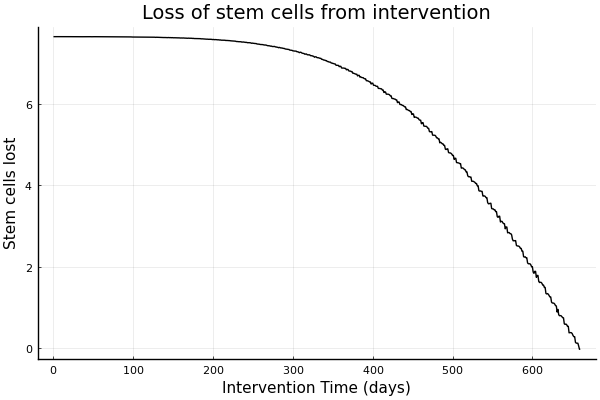

In [46]:
itimes = collect(0:1:660)#[100, 200]#, 60, 100, 300, 600]
itimes = metrics_loss.itime
rawsim = simulate(betamodel, Dict(:t₁ => 700.0))
regsim = link(betamodel, rawsim)
nsc660 = regsim[times .== 660.0, 1][1]
nscs = map(itimes) do t₁
    rawsim = simulate(betamodel, Dict(:t₁ => t₁))
    regsim = link(betamodel, rawsim)
    nsc660 .- regsim[times .== 660.0, 1][1]
end
metrics_loss[!,"beta_partself"] = nscs
plot(itimes, nscs, lc=:black, lab="", xlab="Intervention Time (days)", ylab="Stem cells lost", title="Loss of stem cells from intervention")

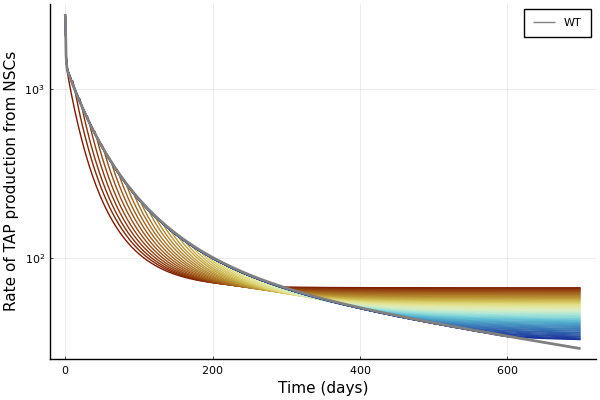

In [47]:
itimes = collect(0:10:600)#[100, 200]#, 60, 100, 300, 600]
colours = cgrad(:roma, length(itimes), categorical=true, rev=false)
rawsim = simulate(betamodel, Dict(:t₁ => 700.0))
sim = link(betamodel, rawsim)
p = plot(xlab="Time (days)", ylab="Rate of TAP production from NSCs", yscale=:log10)
hillfun(t₁) = (x, t) -> 1 - hill(param[:kab_wt], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
for (i, t₁) in enumerate(itimes)
    rawsim = simulate(betamodel, Dict(:t₁ => Float64(t₁)))
    #has_changed = times .> t₁
    plot!(p, times, rawsim[:,2] .* 2 .* 0.95 .* (1 .- hillfun(t₁).(rawsim[:,1], times)), lab="", lc=colours[i])
end
rawsim = simulate(betamodel, Dict(:t₁ => Float64(700)))
plot!(p, times, rawsim[:,2] .* 2 .* 0.95 .* (1 .- param_bt[:wt].(times)), lab="WT", lc=:gray, lw=2)
#plot!(p, sim_ifnko_both.t, sim_ifnko_both.active .* sim_ifnko_both.counts .* sim_ifnko_both.b .* 2 .* 0.95, lab="KO", lc=:red, lw=2)
p
#savefig("plots/scenario1-lifelong-neurogenesis.svg")

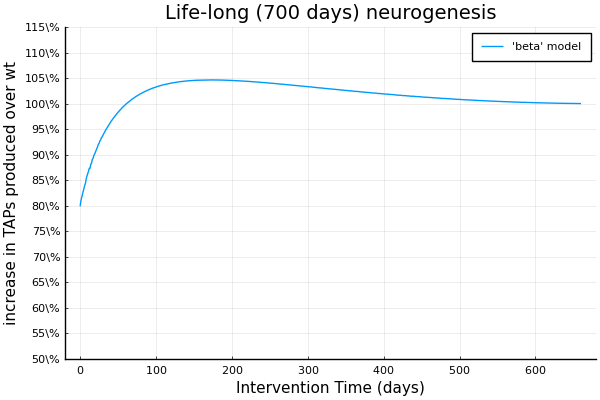

In [48]:
itimes = metrics_loss.itime
int_neurogenesis_1 = zeros(Float64, length(itimes))
#int_neurogenesis_2 = zeros(Float64, length(itimes))
int_neurogenesis_wt = zeros(Float64, length(itimes))
step = times[2] - times[1]
hillfun(t₁) = (x, t) -> 1 - hill(param[:kab_wt], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
for (i, t₁) in enumerate(itimes)
    rawsim = simulate(betamodel, Dict(:t₁ => Float64(t₁)))
    int_neurogenesis_1[i] = sum(rawsim[:,2] .* 2 .* 0.95 .* (1 .- hillfun(t₁).(rawsim[:,1], times)))
    #rawsim = simulate(betamodel, Dict(:t₁ => Float64(t₁)))
    #int_neurogenesis_2[i] = sum(rawsim[:,2] .* 2 .* 0.95 .* (1 .- param_bt[:wt].(times)))
    rawsim = simulate(betamodel, Dict(:t₁ => Float64(700)))
    int_neurogenesis_wt[i] = sum(rawsim[:,2] .* 2 .* 0.95 .* (1 .- hillfun(t₁).(rawsim[:,1], times)))
end
yticks = 50:5:115
plot(xlab="Intervention Time (days)", ylab="increase in TAPs produced over wt", title="Life-long (700 days) neurogenesis", yticks=(collect(yticks), ["$x\\%" for x in yticks]))
metrics_neurogen[!,"beta_partself"] = int_neurogenesis_1 ./ int_neurogenesis_wt
plot!(itimes, int_neurogenesis_1 ./ int_neurogenesis_wt .* 100, lab="'beta' model")
#plot!(itimes, int_neurogenesis_2 ./ int_neurogenesis_wt .* 100, lab="'value' model")
#plot!(itimes, int_neurogenesis_wt .* step, lab="wt", lc=:gray)

## Self-renewal is genotype invariant

In [49]:
param_beta = Dict( # from cofit
    #:nsc₀ => 1986.0,
    :nsc₀ => 5000.0,
    #:r₀ => 0.8426,
    :r₀ => 0.672387,
    #:βr => 0.001891,
    :βr => 0.0015538,
    :kab_wt => 153.724,
    :kab_ko => 153.724,
    :nb_wt => 0.0584954,
    :nb_ko => 0.0584954,
    #:nb_ko => 0.0765863,
    :pₛ => 0.95,
)

Dict{Symbol, Float64} with 8 entries:
  :kab_ko => 153.724
  :kab_wt => 153.724
  :nb_ko  => 0.0584954
  :βr     => 0.0015538
  :r₀     => 0.672387
  :nsc₀   => 5000.0
  :nb_wt  => 0.0584954
  :pₛ     => 0.95

In [50]:
times = collect(0:1:700.0)
betamodel = ChangedBetaSelf((0.0, 700.0), times, zeros(Int64, length(times)), param_beta)

ChangedBetaSelf((0.0, 700.0), [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0  …  691.0, 692.0, 693.0, 694.0, 695.0, 696.0, 697.0, 698.0, 699.0, 700.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [5 => 153.724, 4 => 153.724, 7 => 0.0584954, 3 => 0.0015538, 2 => 0.672387, 1 => 5000.0, 6 => 0.0584954, 8 => 0.95])

In [51]:
free_parameters(betamodel)

1-element Vector{Symbol}:
 :t₁

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


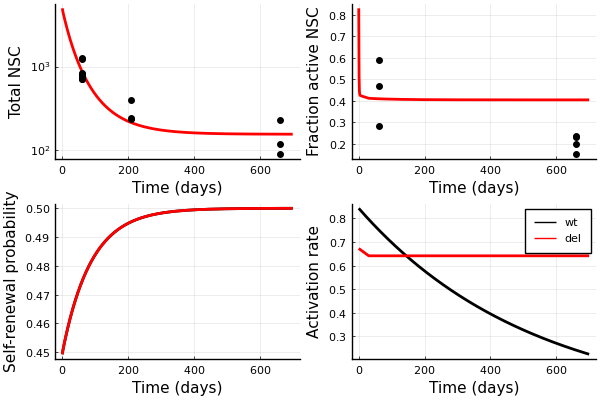

In [52]:
t₁ = 30.0
rawsim = simulate(betamodel, Dict(:t₁ => t₁))
sim = link(betamodel, rawsim)
ylabs = link_names(betamodel)
param = param_beta
hillfun(t₁) = (x, t) -> 1 - hill(param[:kab_wt], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
p1 = plot(times, sim[:,1], lab="", lc=:red, lw=2, yscale=:log10, ylab=ylabs[1])
@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
p2 = plot(times, sim[:,2], lab="", lc=:red, lw=2, ylab=ylabs[2])
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
p3 = plot(times, param_rt[:wt], lab="wt", lc=:black)
plot!(p3, times, rawsim[:,3], lab="del", ylab="Activation rate", lc=:red)
p4 = plot(times, hillfun(800.0).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:black)
plot!(p4, times, hillfun(t₁).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:red)
plot(p1, p2, p4, p3, xlab="Time (days)", lw=2)

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


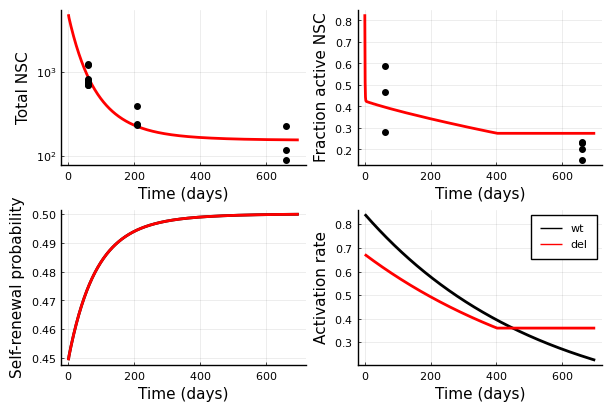

In [53]:
t₁ = 400.0
rawsim = simulate(betamodel, Dict(:t₁ => t₁))
sim = link(betamodel, rawsim)
ylabs = link_names(betamodel)
param = param_beta
hillfun(t₁) = (x, t) -> 1 - hill(param[:kab_wt], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
p1 = plot(times, sim[:,1], lab="", lc=:red, lw=2, yscale=:log10, ylab=ylabs[1])
@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
p2 = plot(times, sim[:,2], lab="", lc=:red, lw=2, ylab=ylabs[2])
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
p3 = plot(times, param_rt[:wt], lab="wt", lc=:black)
plot!(p3, times, rawsim[:,3], lab="del", ylab="Activation rate", lc=:red)
p4 = plot(times, hillfun(800.0).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:black)
plot!(p4, times, hillfun(t₁).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:red)
plot(p1, p2, p4, p3, xlab="Time (days)", lw=2)
savefig("betamodel_static.svg")

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


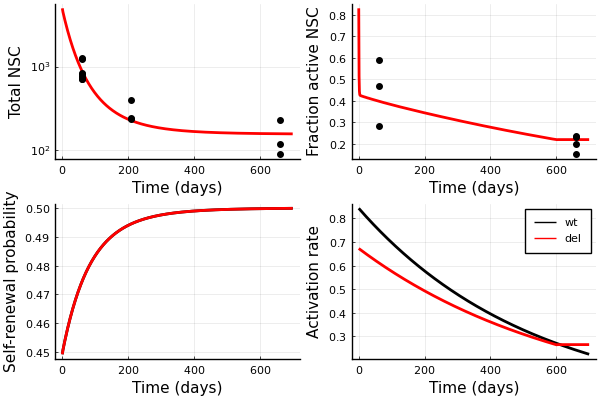

In [54]:
t₁ = 600.0
rawsim = simulate(betamodel, Dict(:t₁ => t₁))
sim = link(betamodel, rawsim)
ylabs = link_names(betamodel)
param = param_beta
hillfun(t₁) = (x, t) -> 1 - hill(param[:kab_wt], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
p1 = plot(times, sim[:,1], lab="", lc=:red, lw=2, yscale=:log10, ylab=ylabs[1])
@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
p2 = plot(times, sim[:,2], lab="", lc=:red, lw=2, ylab=ylabs[2])
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
p3 = plot(times, param_rt[:wt], lab="wt", lc=:black)
plot!(p3, times, rawsim[:,3], lab="del", ylab="Activation rate", lc=:red)
p4 = plot(times, hillfun(800.0).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:black)
plot!(p4, times, hillfun(t₁).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:red)
plot(p1, p2, p4, p3, xlab="Time (days)", lw=2)

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


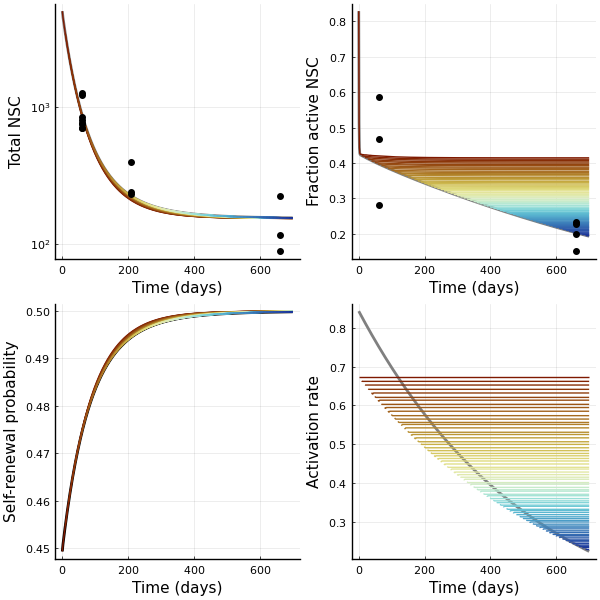

In [55]:
itimes = collect(0:10:699)#[100, 200]#, 60, 100, 300, 600]
colours = cgrad(:roma, length(itimes), categorical=true, rev=false)
rawsim = simulate(betamodel, Dict(:t₁ => 700.0))
sim = link(betamodel, rawsim)
ylabs = link_names(betamodel)
p1 = plot(times, sim[:,1], lab="", lc=:gray, lw=2, yscale=:log10, ylab=ylabs[1])
p2 = plot(times, sim[:,2], lab="", lc=:gray, lw=2, ylab=ylabs[2])
p3 = plot(times, param_rt[:wt], lab="", ylab="Activation rate", lc=:gray, lw=2)
#p4 = plot(times, param_bt[:wt], lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:black, lw=2)
p4 = plot(times, hillfun(800).(sim[:,1], times), lab="", 
          ylab="Self-renewal probability", legend=:bottomright, lc=:black, lw=2)
for (i, t₁) in enumerate(itimes)
    rawsim = simulate(betamodel, Dict(:t₁ => Float64(t₁)))
    sim = link(betamodel, rawsim)
    has_changed = times .> t₁
    has_changed[max(1, findfirst(has_changed)-2):end] .= true
    plot!(p1, times[has_changed], sim[has_changed,1], lab="", lw=1, lc=colours[i]) #t₁=$t₁
    plot!(p2, times[has_changed], sim[has_changed,2], lab="", lw=1, lc=colours[i])
    plot!(p3, times[has_changed], rawsim[has_changed,3], lab="", lw=1, lc=colours[i])
    plot!(p4, times[has_changed], hillfun(t₁).(sim[:,1], times)[has_changed], lab="", lw=1, lc=colours[i])
end
#plot!(p1, times, sim[:,1], lab="", lc=:red, lw=2)
@df @where(data, :genotype .== "wt", :name .== "total")  scatter!(p1, :age, :value, mc=:black, lab="")
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
plot(p1, p2, p4, p3, xlab="Time (days)", size=(600, 600))

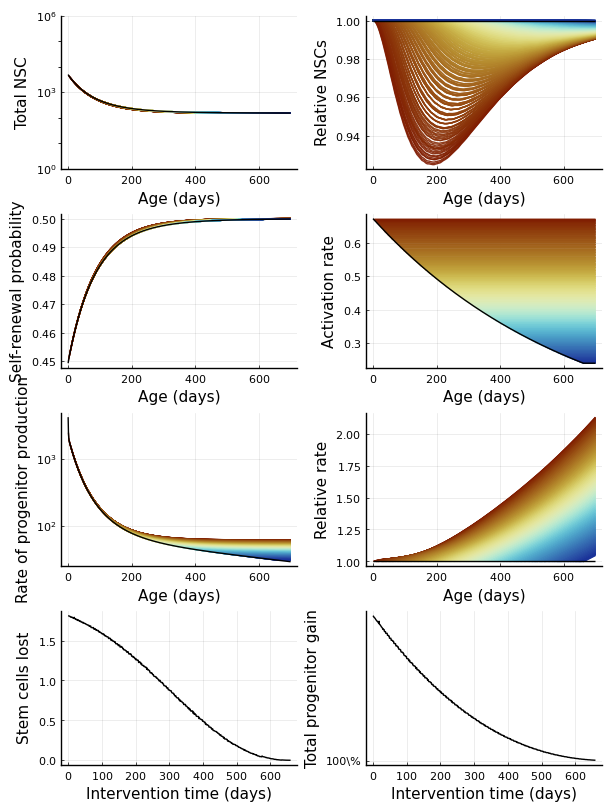

┌ Warning: No strict ticks found
└ @ PlotUtils /home/jooa/.julia/packages/PlotUtils/VgXdq/src/ticks.jl:294


"sims/freeze_activation_shared_self_absolute_neurogen.csv"

In [56]:
#pgfplots()
pyplot()
itimes = collect(0:1:660)
rawsim = simulate(betamodel, Dict(:t₁ => 800.0)) # No intervention model
nonsim = link(betamodel, rawsim)
sim = nonsim
ylabs = link_names(betamodel)
param = param_beta
hillfun(t₁) = (x, t) -> 1 - hill(t < t₁ ? param[:kab_wt] : param[:kab_ko], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
# Plot base simulation (wt)
p1 = plot(yscale=:log10, ylab=ylabs[1], xlab="Age (days)")
p2 = plot(ylab="Relative NSCs", xlab="Age (days)")
p3 = plot(xlab="Age (days)", ylab="Activation rate")
p4 = plot(xlab="Age (days)",  ylab="Self-renewal probability", legend=:bottomright)
# ???
neurogen_wt = 2 .* 0.95 .* (1 .- hillfun(800.0).(sim[:,1], times)) .* rawsim[:,2]
tot = 2 .* 0.95 .* (1 .- hillfun(800.0).(sim[:,1], times)) .* rawsim[:,2]
tot_wt = sim[:,1]
tot_rel = DataFrame(:t => times, :wt => tot_wt ./ tot_wt)
neurogen_rel = DataFrame(:t => times, :wt => neurogen_wt ./ neurogen_wt)
tot_abs = DataFrame(:t => times, :wt => tot_wt)
neurogen_abs = DataFrame(:t => times, :wt => neurogen_wt)
p5 = plot(yscale=:log10, ylab="Rate of progenitor production", xlab="Age (days)")
p6 = plot(ylab="Relative rate", xlab="Age (days)")
# Plot interventions
colours = cgrad(:roma, length(itimes), categorical=true, rev=false)
# Compute some things
step = times[2] - times[1]
non_neurogen = step .* neurogen_wt
# Preallocate vectors
loss = zeros(Float64, length(itimes))
total_neurogen = zeros(Float64, length(itimes))
for (i, itime) in enumerate(itimes)
    rawsim = simulate(betamodel, Dict(:t₁ => Float64(itime)))
    changed = times .> itime
    sim = link(betamodel, rawsim)
    loss[i] = nonsim[findfirst(times .== 660.0), 1] .- sim[findfirst(times .== 660.0),1]
    neurogen = 2 .* 0.95 .* (1 .- hillfun(itime).(sim[:,1], times)) .* rawsim[:,2]
    total_neurogen[i] = sum(neurogen .* step) ./ sum(non_neurogen)
    plot!(p1, times[changed], sim[changed,1], lab="", lc=colours[i], la=0.9)
    plot!(p2, times, sim[:,1] ./ tot_wt, lab="", lc=colours[i], la=0.9)
    plot!(p3, times[changed], rawsim[changed,3], lab="", lc=colours[i], la=0.9)
    plot!(p4, times[changed], hillfun(itime).(sim[changed,1], times[changed]), lab="", lc=colours[i], la=0.9)
    plot!(p5, times[changed], neurogen[changed], lab="", lc=colours[i], la=0.9)
    plot!(p6, times[changed], neurogen[changed] ./ neurogen_wt[changed], lab="", lc=colours[i], la=0.9)
    tot_rel[!,"d$(Int64(round(itime)))"] = sim[:,1] ./ tot_wt
    neurogen_rel[!,"d$(Int64(round(itime)))"] = neurogen ./ neurogen_wt
    tot_abs[!,"d$(Int64(round(itime)))"] = sim[:,1]
    neurogen_abs[!,"d$(Int64(round(itime)))"] = neurogen
end
# Plot previous simulation
plot!(p1, times, nonsim[:,1], lab="", lc=:black, lw=2)
plot!(p2, times, nonsim[:,1] ./ nonsim[:,1], lab="", lc=:black, lw=2)
plot!(p3, times, rawsim[:,3], lab="", lc=:black, lw=2)
plot!(p4, times, hillfun(800.0).(nonsim[:,1], times), lab="", lc=:black, lw=2)
plot!(p5, times, neurogen_wt, lc=:black, lw=2, lab="")
plot!(p6, times, neurogen_wt ./ neurogen_wt, lc=:black, lw=2, lab="")
# Plot data
#@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
#@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
# Plot metrics
p7 = plot(itimes, loss, lab="", ylab="Stem cells lost", xlab="Intervention time (days)", lc=:black)
steps = round(minimum(total_neurogen); sigdigits=1):0.05:round(maximum(total_neurogen); sigdigits=1)
p8 = plot(itimes, total_neurogen, lc=:black, lab="", ylab="Total progenitor gain", xlab = "Intervention time (days)",
          ytick=(collect(steps), ["$(Int64(100*x))\\%" for x in steps]))
#p7 = plot(itimes, total_neurogen)
l = @layout [
    p1 p2;
    p3 p4;
    p5 p6;
    p7 p8;
]
plot(p1, p2, p4, p3, p5, p6, p7, p8, lw=1, layout=l, size=(600, 800))
#savefig("freeze_activation_shared_self.tex")
savefig("freeze_activation_shared_self.svg")
tot_rel |> CSV.write("sims/freeze_activation_shared_self_relative_nsc.csv")
neurogen_rel |> CSV.write("sims/freeze_activation_shared_self_relative_neurogen.csv")
tot_abs |> CSV.write("sims/freeze_activation_shared_self_absolute_nsc.csv")
neurogen_abs |> CSV.write("sims/freeze_activation_shared_self_absolute_neurogen.csv")

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


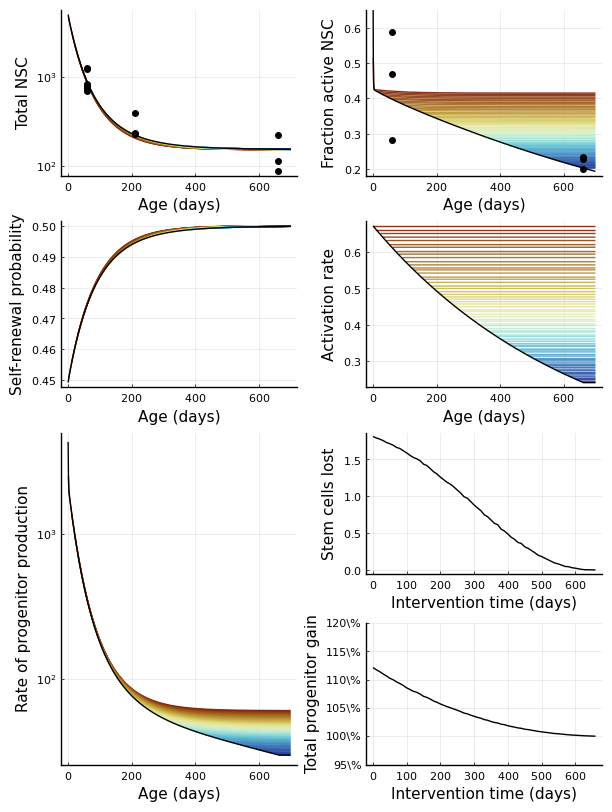

In [57]:
#pgfplots()
pyplot()
rawsim = simulate(betamodel, Dict(:t₁ => 800.0)) # No intervention model
itimes = collect(0:10:660)
nonsim = link(betamodel, rawsim)
ylabs = link_names(betamodel)
param = param_beta
hillfun(t₁) = (x, t) -> 1 - hill(param[:kab_wt], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
# Plot base simulation (wt)
p1 = plot(yscale=:log10, ylab=ylabs[1], xlab="Age (days)")
#p2 = plot(ylab=ylabs[2], xlab="Age (days)")
p2 = plot(ylab=ylabs[2], xlab="Age (days)", ylim=(0.18, 0.65))
p3 = plot(xlab="Age (days)", ylab="Activation rate")
p4 = plot(xlab="Age (days)",  ylab="Self-renewal probability", legend=:bottomright)
# ???
neurogen = 2 .* 0.95 .* (1 .- hillfun(800.0).(sim[:,1], times)) .* rawsim[:,2]
p5 = plot(yscale=:log10, ylab="Rate of progenitor production", xlab="Age (days)")
# Plot interventions
colours = cgrad(:roma, length(itimes), categorical=true, rev=false)
# Compute some things
step = times[2] - times[1]
non_neurogen = step .* neurogen
# Preallocate vectors
loss = zeros(Float64, length(itimes))
total_neurogen = zeros(Float64, length(itimes))
for (i, itime) in enumerate(itimes)
    rawsim = simulate(betamodel, Dict(:t₁ => Float64(itime)))
    changed = times .> itime
    sim = link(betamodel, rawsim)
    loss[i] = nonsim[findfirst(times .== 660.0), 1] .- sim[findfirst(times .== 660.0),1]
    neurogen = 2 .* 0.95 .* (1 .- hillfun(itime).(sim[:,1], times)) .* rawsim[:,2]
    total_neurogen[i] = sum(neurogen .* step) ./ sum(non_neurogen)
    plot!(p1, times[changed], sim[changed,1], lab="", lc=colours[i], la=0.9)
    plot!(p2, times[changed], sim[changed,2], lab="", lc=colours[i], la=0.9)
    plot!(p3, times[changed], rawsim[changed,3], lab="", lc=colours[i], la=0.9)
    plot!(p4, times[changed], hillfun(itime).(sim[changed,1], times[changed]), lab="", lc=colours[i], la=0.9)
    plot!(p5, times[changed], neurogen[changed], lab="", lc=colours[i], la=0.9)
end
# Plot previous sims
plot!(p1, times, nonsim[:,1], lab="", lc=:black, lw=2)
plot!(p2, times, nonsim[:,2], lab="", lc=:black, lw=2)
plot!(p3, times, rawsim[:,3], lab="", lc=:black, lw=2)
plot!(p4, times, hillfun(800.0).(nonsim[:,1], times), lab="", lc=:black, lw=2)
plot!(p5, times, neurogen, lc=:black, lw=2, lab="")
# Plot data
@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
# Plot metrics
p6 = plot(itimes, loss, lab="", ylab="Stem cells lost", xlab="Intervention time (days)", lc=:black)
neurogen_range = maximum(total_neurogen) - minimum(total_neurogen)
steps = 0.95:0.05:1.2
p7 = plot(itimes, total_neurogen, lc=:black, lab="", ylab="Total progenitor gain", xlab = "Intervention time (days)",
          ytick=(collect(steps), ["$(Int64(round(100*x)))\\%" for x in steps]))
#p7 = plot(itimes, total_neurogen)
l = @layout [
    p1 p2;
    p3 p4;
    p5{.5h} [p6;
             p7]
]
plot(p1, p2, p4, p3, p5, p6, p7, lw=1, layout=l, size=(600, 800))
#savefig("freeze_activation_individual_self.tex")
savefig("freeze_activation_shared_self.svg")

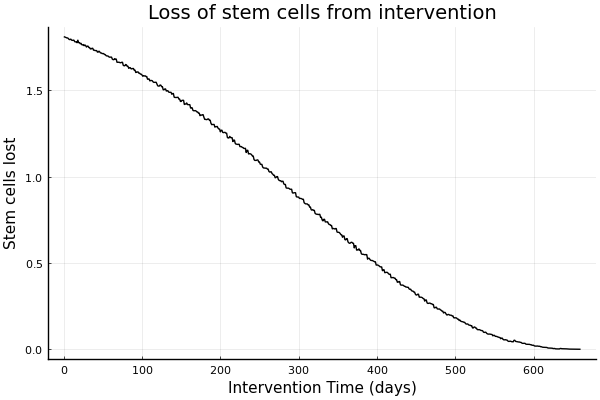

In [58]:
itimes = collect(0:1:660)#[100, 200]#, 60, 100, 300, 600]
itimes = metrics_loss.itime
rawsim = simulate(betamodel, Dict(:t₁ => 700.0))
regsim = link(betamodel, rawsim)
nsc660 = regsim[times .== 660.0, 1][1]
nscs = map(itimes) do t₁
    rawsim = simulate(betamodel, Dict(:t₁ => t₁))
    regsim = link(betamodel, rawsim)
    nsc660 .- regsim[times .== 660.0, 1][1]
end
metrics_loss[!,"beta_noself"] = nscs
plot(itimes, nscs, lc=:black, lab="", xlab="Intervention Time (days)", ylab="Stem cells lost", title="Loss of stem cells from intervention")

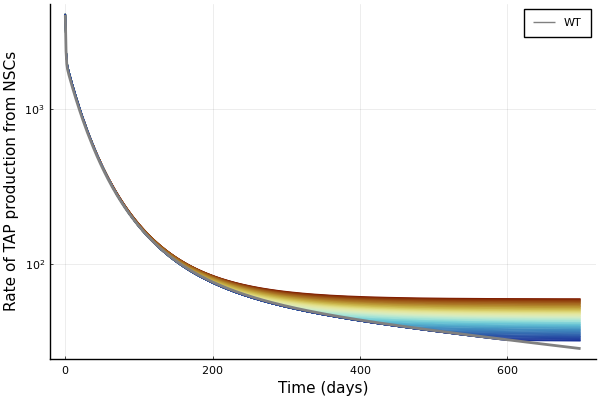

In [59]:
itimes = collect(0:10:600)#[100, 200]#, 60, 100, 300, 600]
colours = cgrad(:roma, length(itimes), categorical=true, rev=false)
rawsim = simulate(betamodel, Dict(:t₁ => 700.0))
sim = link(betamodel, rawsim)
p = plot(xlab="Time (days)", ylab="Rate of TAP production from NSCs", yscale=:log10)
#hillfun(t₁) = (x, t) -> 1 - hill(param[:kab], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
hillfun(t₁) = (x, t) -> 1 - hill(t < t₁ ? param[:kab_wt] : param[:kab_ko], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
for (i, t₁) in enumerate(itimes)
    rawsim = simulate(betamodel, Dict(:t₁ => Float64(t₁)))
    #has_changed = times .> t₁
    plot!(p, times, rawsim[:,2] .* 2 .* 0.95 .* (1 .- hillfun(t₁).(rawsim[:,1], times)), lab="", lc=colours[i])
end
rawsim = simulate(betamodel, Dict(:t₁ => Float64(700)))
plot!(p, times, rawsim[:,2] .* 2 .* 0.95 .* (1 .- param_bt[:wt].(times)), lab="WT", lc=:gray, lw=2)
#plot!(p, sim_ifnko_both.t, sim_ifnko_both.active .* sim_ifnko_both.counts .* sim_ifnko_both.b .* 2 .* 0.95, lab="KO", lc=:red, lw=2)
p
#savefig("plots/scenario1-lifelong-neurogenesis.svg")

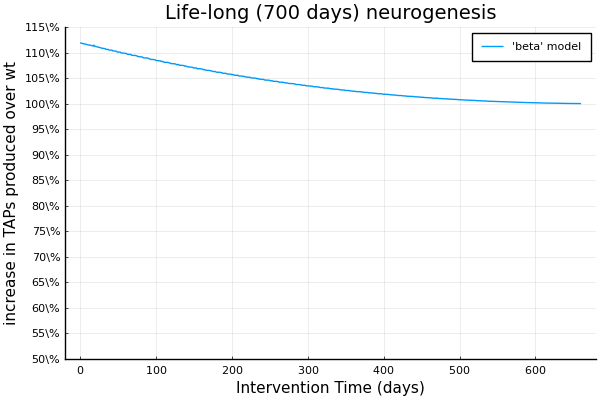

In [60]:
itimes = metrics_loss.itime
int_neurogenesis_1 = zeros(Float64, length(itimes))
#int_neurogenesis_2 = zeros(Float64, length(itimes))
int_neurogenesis_wt = zeros(Float64, length(itimes))
step = times[2] - times[1]
#hillfun(t₁) = (x, t) -> 1 - hill(param[:kab], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
hillfun(t₁) = (x, t) -> 1 - hill(t < t₁ ? param[:kab_wt] : param[:kab_ko], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
for (i, t₁) in enumerate(itimes)
    rawsim = simulate(betamodel, Dict(:t₁ => Float64(t₁)))
    int_neurogenesis_1[i] = sum(rawsim[:,2] .* 2 .* 0.95 .* (1 .- hillfun(t₁).(rawsim[:,1], times)))
    #rawsim = simulate(betamodel, Dict(:t₁ => Float64(t₁)))
    #int_neurogenesis_2[i] = sum(rawsim[:,2] .* 2 .* 0.95 .* (1 .- param_bt[:wt].(times)))
    rawsim = simulate(betamodel, Dict(:t₁ => Float64(700)))
    int_neurogenesis_wt[i] = sum(rawsim[:,2] .* 2 .* 0.95 .* (1 .- hillfun(t₁).(rawsim[:,1], times)))
end
yticks = 50:5:115
plot(xlab="Intervention Time (days)", ylab="increase in TAPs produced over wt", title="Life-long (700 days) neurogenesis", yticks=(collect(yticks), ["$x\\%" for x in yticks]))
metrics_neurogen[!,"beta_noself"] = int_neurogenesis_1 ./ int_neurogenesis_wt
plot!(itimes, int_neurogenesis_1 ./ int_neurogenesis_wt .* 100, lab="'beta' model")
#plot!(itimes, int_neurogenesis_2 ./ int_neurogenesis_wt .* 100, lab="'value' model")
#plot!(itimes, int_neurogenesis_wt .* step, lab="wt", lc=:gray)

# Value/self model

In this model the effect of interferon is a changed $r$. 

This just means that we need a two-stage $r(t)$ with parameters $\theta_r = (r_0, \beta_r, r_1, t_1)$ which then is
$$
r(t) = \begin{cases}
r_0 \cdot e^{-\beta_rt} & \text{if } t < t_1\\
r_1 & \text{else}\\
\end{cases}
$$

In [61]:
function broken_exponential_decay(x₀, β, x₁, t₁, t)
    if t < t₁
        x₀ * exp(-β*t)
    else
        x₁
    end
end
broken_exponential_decay(x₀, β, x₁, t₁) = t -> broken_exponential_decay(x₀, β, x₁, t₁, t)

broken_exponential_decay (generic function with 2 methods)

In [62]:
struct ChangedValueSelf <: ODEModel
    tspan::Tuple{Float64, Float64}
    times::Vector{Float64}
    values::Vector{Int64}
    fixed::Vector{Pair{Int64, Float64}}
    ChangedValueSelf(tspan, times, values, fixed::Vector{Pair{I, N}}) where {I <: Integer, N <: Number} = new(tspan, times, values, fixed)
end
function ratefun(model::ChangedValueSelf)
    function(du, u, p, t)
        _, r₀, βr, kab_wt, kab_ko, nb_wt, nb_ko, pₛ, r₁, t₁ = p
        Q = u[1]; A = u[2]
        b = 1 - hill(t < t₁ ? kab_wt : kab_ko, 
                     t < t₁ ? nb_wt : nb_ko, Q+A)
        r = broken_exponential_decay(r₀, βr, r₁, t₁, t)
        du[1] = dQ = -r * Q + 2* b * pₛ * A
        du[2] = dA = r * Q - pₛ * A
    end
end
function initial(t::ChangedValueSelf, x::AbstractVector)
    nsc₀, r₀, _, kab_wt, _, nb_wt, _, pₛ,  _, _ = x
    b₀ = hill(kab_wt, nb_wt, 0)
    ratio = sqrt(((pₛ - r₀)/(2*r₀))^2 + (2*b₀*pₛ) / r₀)
    nsc₀ .* [1-1/(ratio+1), 1/(ratio+1)]
end
link(t::ChangedValueSelf, x::AbstractArray) = hcat(x[:,1] .+ x[:,2], x[:,2] ./ (x[:,1] .+ x[:,2]))
parameter_names(t::Type{ChangedValueSelf}) = [:nsc₀, :r₀, :βr, :kab_wt, :kab_ko, :nb_wt, :nb_ko, :pₛ, :r₁, :t₁]
bounds(t::ChangedValueSelf) = [(100.0, 10000.0), (0.0, 1.0), (0.0, 0.1), (0.0, 1000.0), (0.0, 1000.0), (0.01, 0.1), (0.01, 0.1), (0.0, 1.0), (0.0, 1.0), (0.0, 700.0)]
output_names(t::ChangedValueSelf) = ["qNSC", "aNSC"]
link_names(t::ChangedValueSelf) = ["Total NSC", "Fraction active NSC"]

link_names (generic function with 4 methods)

## Self-renewal depends on genotype

In [63]:
#=
param_value = Dict( # from partial cofit
    :nsc₀ => 1986.0,
    :r₀ => 0.8426,
    :r₁ => 0.4928,
    :βr => 0.001891,
    :kab => 147.969,
    :nb_wt => 0.0300083,
    :nb_ko => 0.0765863,
    :pₛ => 0.95,
)
=#
param_value = Dict( # from partial cofit
    :nsc₀ => 3000.0,
    :r₀ => 0.80691,
    :r₁ => 0.493757,
    :βr => 0.00184341,
    :kab_wt => 148.364,
    :kab_ko => 155.445,
    :nb_wt => 0.0399102,
    :nb_ko => 0.0843197,
    :pₛ => 0.95,
)

Dict{Symbol, Float64} with 9 entries:
  :kab_ko => 155.445
  :kab_wt => 148.364
  :nb_ko  => 0.0843197
  :βr     => 0.00184341
  :r₀     => 0.80691
  :nsc₀   => 3000.0
  :r₁     => 0.493757
  :nb_wt  => 0.0399102
  :pₛ     => 0.95

In [64]:
times = collect(0:1:700.0)
valuemodel = ChangedValueSelf((0.0, 700.0), times, zeros(Int64, length(times)), param_value)

ChangedValueSelf((0.0, 700.0), [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0  …  691.0, 692.0, 693.0, 694.0, 695.0, 696.0, 697.0, 698.0, 699.0, 700.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [5 => 155.445, 4 => 148.364, 7 => 0.0843197, 3 => 0.00184341, 2 => 0.80691, 1 => 3000.0, 9 => 0.493757, 6 => 0.0399102, 8 => 0.95])

In [65]:
free_parameters(valuemodel)

1-element Vector{Symbol}:
 :t₁

In [66]:
valuemodel_r = t₁ -> broken_exponential_decay(param_value[:r₀], param_value[:βr], param_value[:r₁], t₁)

#431 (generic function with 1 method)

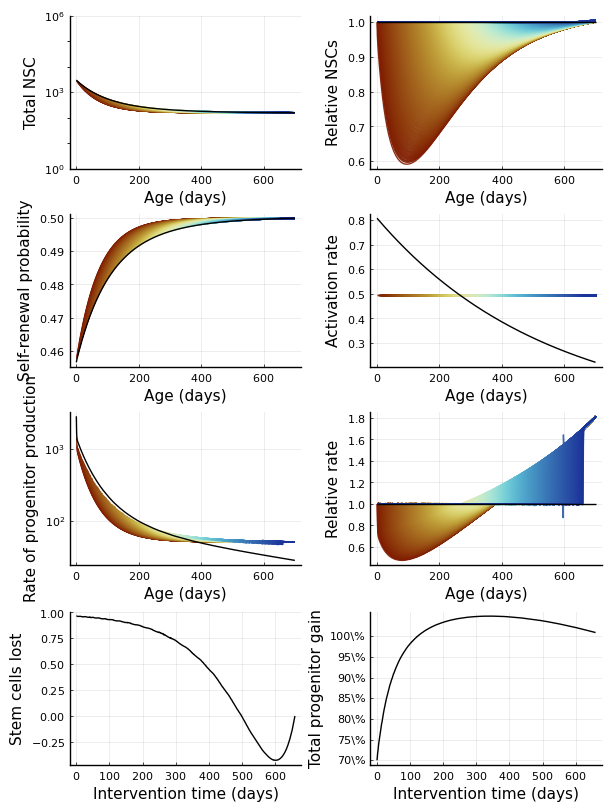

┌ Warning: No strict ticks found
└ @ PlotUtils /home/jooa/.julia/packages/PlotUtils/VgXdq/src/ticks.jl:294


"sims/jump_activation_individual_self_absolute_neurogen.csv"

In [67]:
#pgfplots()
pyplot()
itimes = collect(0:1:660)
rawsim = simulate(valuemodel, Dict(:t₁ => 800.0)) # No intervention model
nonsim = link(valuemodel, rawsim)
sim = nonsim
ylabs = link_names(valuemodel)
param = param_beta
hillfun(t₁) = (x, t) -> 1 - hill(t < t₁ ? param[:kab_wt] : param[:kab_ko], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
# Plot base simulation (wt)
p1 = plot(yscale=:log10, ylab=ylabs[1], xlab="Age (days)")
p2 = plot(ylab="Relative NSCs", xlab="Age (days)")
p3 = plot(xlab="Age (days)", ylab="Activation rate")
p4 = plot(xlab="Age (days)",  ylab="Self-renewal probability", legend=:bottomright)
# ???
neurogen_wt = 2 .* 0.95 .* (1 .- hillfun(800.0).(sim[:,1], times)) .* rawsim[:,2]
tot = 2 .* 0.95 .* (1 .- hillfun(800.0).(sim[:,1], times)) .* rawsim[:,2]
tot_wt = sim[:,1]
tot_rel = DataFrame(:t => times, :wt => tot_wt ./ tot_wt)
neurogen_rel = DataFrame(:t => times, :wt => neurogen_wt ./ neurogen_wt)
tot_abs = DataFrame(:t => times, :wt => tot_wt)
neurogen_abs = DataFrame(:t => times, :wt => neurogen_wt)
p5 = plot(yscale=:log10, ylab="Rate of progenitor production", xlab="Age (days)")
p6 = plot(ylab="Relative rate", xlab="Age (days)")
# Plot interventions
colours = cgrad(:roma, length(itimes), categorical=true, rev=false)
# Compute some things
step = times[2] - times[1]
non_neurogen = step .* neurogen_wt
# Preallocate vectors
loss = zeros(Float64, length(itimes))
total_neurogen = zeros(Float64, length(itimes))
for (i, itime) in enumerate(itimes)
    rawsim = simulate(valuemodel, Dict(:t₁ => Float64(itime)))
    changed = times .> itime
    sim = link(valuemodel, rawsim)
    loss[i] = nonsim[findfirst(times .== 660.0), 1] .- sim[findfirst(times .== 660.0),1]
    neurogen = 2 .* 0.95 .* (1 .- hillfun(itime).(sim[:,1], times)) .* rawsim[:,2]
    total_neurogen[i] = sum(neurogen .* step) ./ sum(non_neurogen)
    plot!(p1, times[changed], sim[changed,1], lab="", lc=colours[i], la=0.9)
    plot!(p2, times, sim[:,1] ./ tot_wt, lab="", lc=colours[i], la=0.9)
    #plot!(p3, times[changed], rawsim[changed,3], lab="", lc=colours[i], la=0.9)
    plot!(p3, times[changed], valuemodel_r(itime).(times[changed]), lab="", lc=colours[i], la=0.9)
    plot!(p4, times[changed], hillfun(itime).(sim[changed,1], times[changed]), lab="", lc=colours[i], la=0.9)
    plot!(p5, times[changed], neurogen[changed], lab="", lc=colours[i], la=0.9)
    plot!(p6, times, neurogen ./ neurogen_wt, lab="", lc=colours[i], la=0.9)
    tot_rel[!,"d$(Int64(round(itime)))"] = sim[:,1] ./ tot_wt
    neurogen_rel[!,"d$(Int64(round(itime)))"] = neurogen ./ neurogen_wt
    tot_abs[!,"d$(Int64(round(itime)))"] = sim[:,1]
    neurogen_abs[!,"d$(Int64(round(itime)))"] = neurogen
end
# Plot previous simulation
plot!(p1, times, nonsim[:,1], lab="", lc=:black, lw=2)
plot!(p2, times, nonsim[:,1] ./ nonsim[:,1], lab="", lc=:black, lw=2)
plot!(p3, times, valuemodel_r(900.0), lab="", lc=:black, lw=2)
plot!(p4, times, hillfun(800.0).(nonsim[:,1], times), lab="", lc=:black, lw=2)
plot!(p5, times, neurogen_wt, lc=:black, lw=2, lab="")
plot!(p6, times, neurogen_wt ./ neurogen_wt, lc=:black, lw=2, lab="")
# Plot data
#@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
#@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
# Plot metrics
p7 = plot(itimes, loss, lab="", ylab="Stem cells lost", xlab="Intervention time (days)", lc=:black)
steps = round(minimum(total_neurogen); sigdigits=1):0.05:round(maximum(total_neurogen); sigdigits=1)
p8 = plot(itimes, total_neurogen, lc=:black, lab="", ylab="Total progenitor gain", xlab = "Intervention time (days)",
          ytick=(collect(steps), ["$(Int64(100*x))\\%" for x in steps]))
#p7 = plot(itimes, total_neurogen)
l = @layout [
    p1 p2;
    p3 p4;
    p5 p6;
    p7 p8;
]
plot(p1, p2, p4, p3, p5, p6, p7, p8, lw=1, layout=l, size=(600, 800))
#savefig("jump_activation_individual_self.tex")
savefig("jump_activation_individual_self.svg")
tot_rel |> CSV.write("sims/jump_activation_individual_self_relative_nsc.csv")
neurogen_rel |> CSV.write("sims/jump_activation_individual_self_relative_neurogen.csv")
tot_abs |> CSV.write("sims/jump_activation_individual_self_absolute_nsc.csv")
neurogen_abs |> CSV.write("sims/jump_activation_individual_self_absolute_neurogen.csv")

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


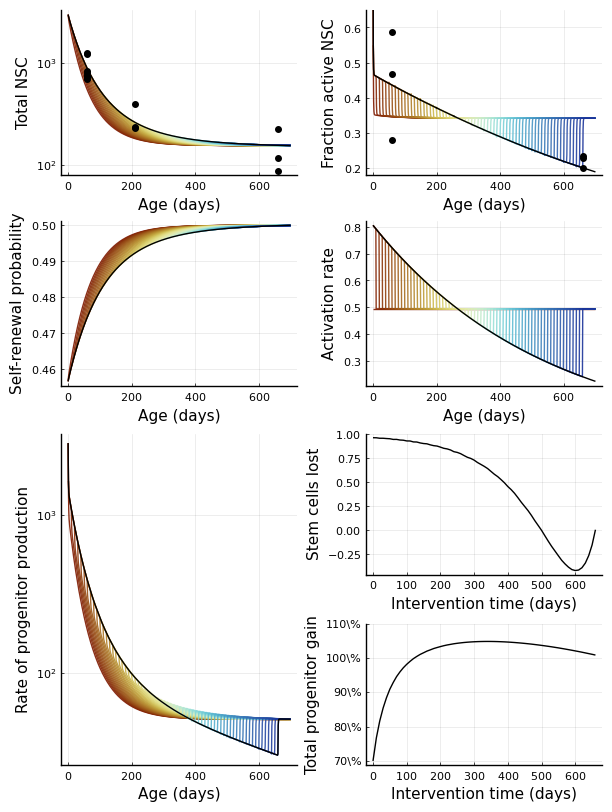

In [68]:
#pgfplots()
pyplot()
rawsim = simulate(valuemodel, Dict(:t₁ => 800.0)) # No intervention model
itimes = collect(0:10:660)
nonsim = link(valuemodel, rawsim)
ylabs = link_names(valuemodel)
param = param_beta
#hillfun(t₁) = (x, t) -> 1 - hill(param[:kab], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
hillfun(t₁) = (x, t) -> 1 - hill(t < t₁ ? param[:kab_wt] : param[:kab_ko], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
# Plot base simulation (wt)
p1 = plot(yscale=:log10, ylab=ylabs[1], xlab="Age (days)")
#p2 = plot(ylab=ylabs[2], xlab="Age (days)")
p2 = plot(ylab=ylabs[2], xlab="Age (days)", ylim=(0.18, 0.65))
p3 = plot(xlab="Age (days)", ylab="Activation rate")
p4 = plot(xlab="Age (days)",  ylab="Self-renewal probability", legend=:bottomright)
# ???
neurogen = 2 .* 0.95 .* (1 .- hillfun(800.0).(sim[:,1], times)) .* rawsim[:,2]
p5 = plot(yscale=:log10, ylab="Rate of progenitor production", xlab="Age (days)")
# Plot interventions
colours = cgrad(:roma, length(itimes), categorical=true, rev=false)
# Compute some things
step = times[2] - times[1]
non_neurogen = step .* neurogen
# Preallocate vectors
loss = zeros(Float64, length(itimes))
total_neurogen = zeros(Float64, length(itimes))
for (i, itime) in enumerate(itimes)
    rawsim = simulate(valuemodel, Dict(:t₁ => Float64(itime)))
    changed = times .> itime
    changed[max(1, findfirst(changed)-20):end] .= true
    sim = link(valuemodel, rawsim)
    loss[i] = nonsim[findfirst(times .== 660.0), 1] .- sim[findfirst(times .== 660.0),1]
    neurogen = 2 .* 0.95 .* (1 .- hillfun(itime).(sim[:,1], times)) .* rawsim[:,2]
    total_neurogen[i] = sum(neurogen .* step) ./ sum(non_neurogen)
    plot!(p1, times[changed], sim[changed,1], lab="", lc=colours[i], la=0.9)
    plot!(p2, times[changed], sim[changed,2], lab="", lc=colours[i], la=0.9)
#    plot!(p3, times[changed], rawsim[changed,3], lab="", lc=colours[i], la=0.9)
    plot!(p3, times[changed], valuemodel_r(itime).(times[changed]), lab="", lc=colours[i], la=0.9)
    plot!(p4, times[changed], hillfun(itime).(sim[changed,1], times[changed]), lab="", lc=colours[i], la=0.9)
    plot!(p5, times[changed], neurogen[changed], lab="", lc=colours[i], la=0.9)
end
# Plot previous sims
plot!(p1, times, nonsim[:,1], lab="", lc=:black, lw=2)
plot!(p2, times, nonsim[:,2], lab="", lc=:black, lw=2)
#p3 = plot(times, param_rt[:wt], lab="wt", lc=:black)
#plot!(p3, times, valuemodel_r(t₁).(times), lab="del", ylab="Activation rate", lc=:red)
plot!(p3, times, valuemodel_r(900.0), lab="", lc=:black, lw=2)
plot!(p4, times, hillfun(800.0).(nonsim[:,1], times), lab="", lc=:black, lw=2)
plot!(p5, times, neurogen, lc=:black, lw=2,lab="")
# Plot data
@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
# Plot metrics
p6 = plot(itimes, loss, lab="", ylab="Stem cells lost", xlab="Intervention time (days)", lc=:black)
neurogen_range = maximum(total_neurogen) - minimum(total_neurogen)
steps = 0.70:0.1:1.1
p7 = plot(itimes, total_neurogen, lc=:black, lab="", ylab="Total progenitor gain", xlab = "Intervention time (days)",
          ytick=(collect(steps), ["$(Int64(round(100*x)))\\%" for x in steps]))
#p7 = plot(itimes, total_neurogen)
l = @layout [
    p1 p2;
    p3 p4;
    p5{.5h} [p6;
             p7]
]
plot(p1, p2, p4, p3, p5, p6, p7, lw=1, layout=l, size=(600, 800))
#savefig("freeze_activation_individual_self.tex")
savefig("jump_activation_individual_self.svg")

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


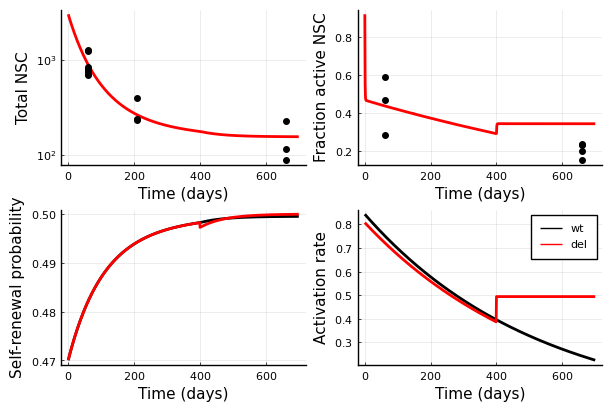

In [69]:
t₁ = 400.0
rawsim = simulate(valuemodel, Dict(:t₁ => t₁))
sim = link(valuemodel, rawsim)
ylabs = link_names(valuemodel)
param = param_value
#hillfun(t₁) = (x, t) -> 1 - hill(param[:kab], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
hillfun(t₁) = (x, t) -> 1 - hill(t < t₁ ? param[:kab_wt] : param[:kab_ko], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
p1 = plot(times, sim[:,1], lab="", lc=:red, lw=2, yscale=:log10, ylab=ylabs[1])
@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
p2 = plot(times, sim[:,2], lab="", lc=:red, lw=2, ylab=ylabs[2])
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
p3 = plot(times, param_rt[:wt], lab="wt", lc=:black)
plot!(p3, times, valuemodel_r(t₁).(times), lab="del", ylab="Activation rate", lc=:red)
p4 = plot(times, hillfun(800.0).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:black)
plot!(p4, times, hillfun(t₁).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:red)
plot(p1, p2, p4, p3, xlab="Time (days)", lw=2)
savefig("valuemodel_interaction.svg")

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


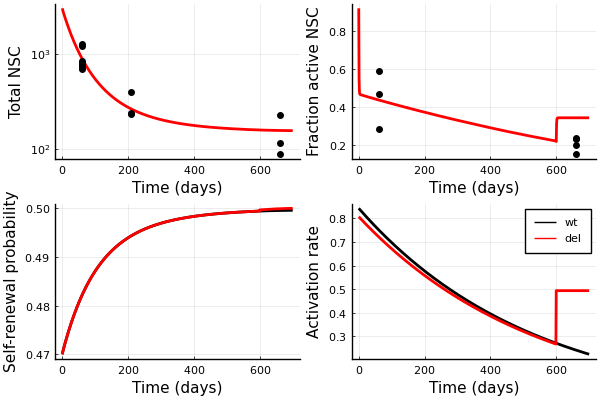

In [70]:
t₁ = 600.0
rawsim = simulate(valuemodel, Dict(:t₁ => t₁))
sim = link(valuemodel, rawsim)
ylabs = link_names(valuemodel)
param = param_value
#hillfun(t₁) = (x, t) -> 1 - hill(param[:kab], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
hillfun(t₁) = (x, t) -> 1 - hill(t < t₁ ? param[:kab_wt] : param[:kab_ko], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
p1 = plot(times, sim[:,1], lab="", lc=:red, lw=2, yscale=:log10, ylab=ylabs[1])
@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
p2 = plot(times, sim[:,2], lab="", lc=:red, lw=2, ylab=ylabs[2])
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
p3 = plot(times, param_rt[:wt], lab="wt", lc=:black)
plot!(p3, times, valuemodel_r(t₁).(times), lab="del", ylab="Activation rate", lc=:red)
p4 = plot(times, hillfun(800.0).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:black)
plot!(p4, times, hillfun(t₁).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:red)
plot(p1, p2, p4, p3, xlab="Time (days)", lw=2)

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


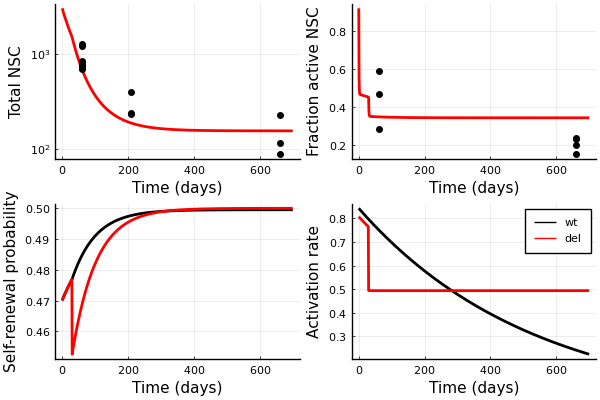

In [71]:
t₁ = 30.0
rawsim = simulate(valuemodel, Dict(:t₁ => t₁))
sim = link(valuemodel, rawsim)
ylabs = link_names(valuemodel)
param = param_value
#hillfun(t₁) = (x, t) -> 1 - hill(param[:kab], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
hillfun(t₁) = (x, t) -> 1 - hill(t < t₁ ? param[:kab_wt] : param[:kab_ko], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
p1 = plot(times, sim[:,1], lab="", lc=:red, lw=2, yscale=:log10, ylab=ylabs[1])
@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
p2 = plot(times, sim[:,2], lab="", lc=:red, lw=2, ylab=ylabs[2])
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
p3 = plot(times, param_rt[:wt], lab="wt", lc=:black)
plot!(p3, times, valuemodel_r(t₁).(times), lab="del", ylab="Activation rate", lc=:red)
p4 = plot(times, hillfun(800.0).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:black)
plot!(p4, times, hillfun(t₁).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:red)
plot(p1, p2, p4, p3, xlab="Time (days)", lw=2)

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


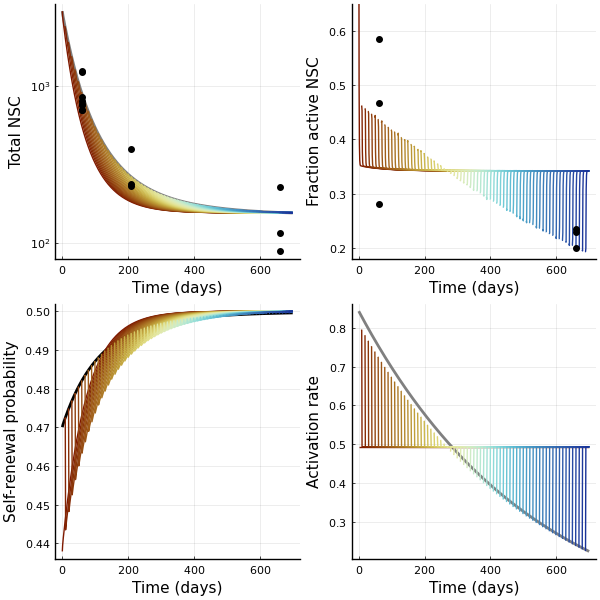

In [72]:
itimes = collect(0:10:699)#[100, 200]#, 60, 100, 300, 600]
colours = cgrad(:roma, length(itimes), categorical=true, rev=false)
rawsim = simulate(valuemodel, Dict(:t₁ => 700.0))
sim = link(valuemodel, rawsim)
ylabs = link_names(valuemodel)
p1 = plot(times, sim[:,1], lab="", lc=:gray, lw=2, yscale=:log10, ylab=ylabs[1])
p2 = plot(ylab=ylabs[2], xlab="Age (days)", ylim=(0.18, 0.65))
#p2 = plot(times, sim[:,2], lab="", lc=:gray, lw=2, ylab=ylabs[2])
p3 = plot(times, param_rt[:wt], lab="", ylab="Activation rate", lc=:gray, lw=2)
#p4 = plot(times, param_bt[:wt], lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:black, lw=2)
p4 = plot(times, hillfun(800).(sim[:,1], times), lab="", 
          ylab="Self-renewal probability", legend=:bottomright, lc=:black, lw=2)
for (i, t₁) in enumerate(itimes)
    rawsim = simulate(valuemodel, Dict(:t₁ => Float64(t₁)))
    sim = link(valuemodel, rawsim)
    has_changed = times .> t₁
    has_changed[max(1, findfirst(has_changed)-3):end] .= true
    plot!(p1, times[has_changed], sim[has_changed,1], lab="", lw=1, lc=colours[i]) #t₁=$t₁
    plot!(p2, times[has_changed], sim[has_changed,2], lab="", lw=1, lc=colours[i])
    plot!(p3, times[has_changed], valuemodel_r(t₁).(times[has_changed]), lab="", lw=1, lc=colours[i])
    plot!(p4, times[has_changed], hillfun(t₁).(sim[:,1], times)[has_changed], lab="", lw=1, lc=colours[i])
end
#plot!(p1, times, sim[:,1], lab="", lc=:red, lw=2)
@df @where(data, :genotype .== "wt", :name .== "total")  scatter!(p1, :age, :value, mc=:black, lab="")
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
plot(p1, p2, p4, p3, xlab="Time (days)", size=(600, 600))

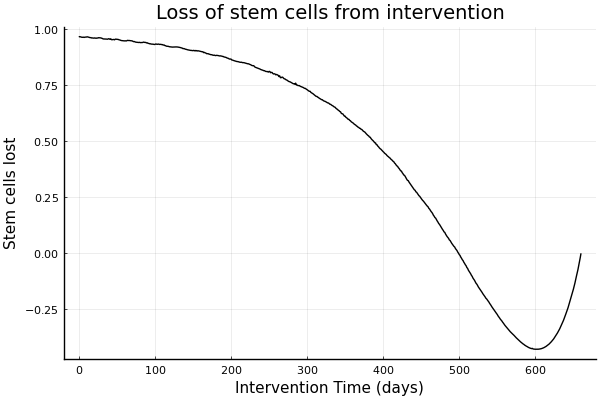

In [73]:
itimes = collect(0:1:660)#[100, 200]#, 60, 100, 300, 600]
itimes = metrics_loss.itime
rawsim = simulate(valuemodel, Dict(:t₁ => 700.0))
regsim = link(valuemodel, rawsim)
nsc660 = regsim[times .== 660.0, 1][1]
nscs = map(itimes) do t₁
    rawsim = simulate(valuemodel, Dict(:t₁ => t₁))
    regsim = link(valuemodel, rawsim)
    nsc660 .- regsim[times .== 660.0, 1][1]
end
metrics_loss[!,"value_fullself"] = nscs
plot(itimes, nscs, lc=:black, lab="", xlab="Intervention Time (days)", ylab="Stem cells lost", title="Loss of stem cells from intervention")

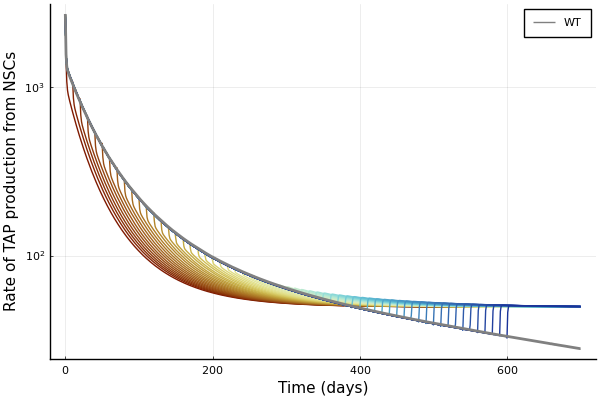

In [74]:
itimes = collect(0:10:600)#[100, 200]#, 60, 100, 300, 600]
colours = cgrad(:roma, length(itimes), categorical=true, rev=false)
rawsim = simulate(valuemodel, Dict(:t₁ => 700.0))
sim = link(valuemodel, rawsim)
p = plot(xlab="Time (days)", ylab="Rate of TAP production from NSCs", yscale=:log10)
#hillfun(t₁) = (x, t) -> 1 - hill(param[:kab], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
hillfun(t₁) = (x, t) -> 1 - hill(t < t₁ ? param[:kab_wt] : param[:kab_ko], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
for (i, t₁) in enumerate(itimes)
    rawsim = simulate(valuemodel, Dict(:t₁ => Float64(t₁)))
    #has_changed = times .> t₁
    plot!(p, times, rawsim[:,2] .* 2 .* 0.95 .* (1 .- hillfun(t₁).(rawsim[:,1], times)), lab="", lc=colours[i])
end
rawsim = simulate(valuemodel, Dict(:t₁ => Float64(700)))
plot!(p, times, rawsim[:,2] .* 2 .* 0.95 .* (1 .- param_bt[:wt].(times)), lab="WT", lc=:gray, lw=2)
#plot!(p, sim_ifnko_both.t, sim_ifnko_both.active .* sim_ifnko_both.counts .* sim_ifnko_both.b .* 2 .* 0.95, lab="KO", lc=:red, lw=2)
p
#savefig("plots/scenario1-lifelong-neurogenesis.svg")

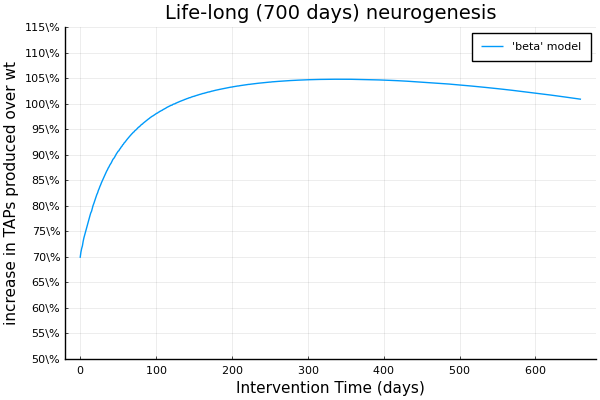

In [75]:
itimes = metrics_loss.itime
int_neurogenesis_1 = zeros(Float64, length(itimes))
#int_neurogenesis_2 = zeros(Float64, length(itimes))
int_neurogenesis_wt = zeros(Float64, length(itimes))
step = times[2] - times[1]
#hillfun(t₁) = (x, t) -> 1 - hill(param[:kab], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
hillfun(t₁) = (x, t) -> 1 - hill(t < t₁ ? param[:kab_wt] : param[:kab_ko], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
for (i, t₁) in enumerate(itimes)
    rawsim = simulate(valuemodel, Dict(:t₁ => Float64(t₁)))
    int_neurogenesis_1[i] = sum(rawsim[:,2] .* 2 .* 0.95 .* (1 .- hillfun(t₁).(rawsim[:,1], times)))
    #rawsim = simulate(valuemodel, Dict(:t₁ => Float64(t₁)))
    #int_neurogenesis_2[i] = sum(rawsim[:,2] .* 2 .* 0.95 .* (1 .- param_bt[:wt].(times)))
    rawsim = simulate(valuemodel, Dict(:t₁ => Float64(700)))
    int_neurogenesis_wt[i] = sum(rawsim[:,2] .* 2 .* 0.95 .* (1 .- hillfun(t₁).(rawsim[:,1], times)))
end
yticks = 50:5:115
metrics_neurogen[!,"value_fullself"] = int_neurogenesis_1 ./ int_neurogenesis_wt
plot(xlab="Intervention Time (days)", ylab="increase in TAPs produced over wt", title="Life-long (700 days) neurogenesis", yticks=(collect(yticks), ["$x\\%" for x in yticks]))
plot!(itimes, int_neurogenesis_1 ./ int_neurogenesis_wt .* 100, lab="'beta' model")
#plot!(itimes, int_neurogenesis_2 ./ int_neurogenesis_wt .* 100, lab="'value' model")
#plot!(itimes, int_neurogenesis_wt .* step, lab="wt", lc=:gray)

## Self-renewal is partially genotype dependent

In [76]:
#=
param_value = Dict( # from cofit
    :nsc₀ => 1986.0,
    :r₀ => 0.8426,
    :r₁ => 0.4928,
    :βr => 0.001891,
    :kab => 141.987,
    :nb_wt => 0.0364225,
    :nb_ko => 0.0364225,
    #:nb_ko => 0.0765863,
    :pₛ => 0.95,
)
=#
param_value = Dict( # from cofit
    :nsc₀ => 3000.0,
    :r₀ => 0.839538,
    :r₁ => 0.491999,
    :βr => 0.00188605,
    :kab_wt => 153.81,
    :kab_ko => 153.81,
    :nb_wt => 0.039907,
    :nb_ko => 0.0841552,
    #:nb_ko => 0.0765863,
    :pₛ => 0.95,
)

Dict{Symbol, Float64} with 9 entries:
  :kab_ko => 153.81
  :kab_wt => 153.81
  :nb_ko  => 0.0841552
  :βr     => 0.00188605
  :r₀     => 0.839538
  :nsc₀   => 3000.0
  :r₁     => 0.491999
  :nb_wt  => 0.039907
  :pₛ     => 0.95

In [77]:
times = collect(0:1:700.0) # 0.1 was step
valuemodel = ChangedValueSelf((0.0, 700.0), times, zeros(Int64, length(times)), param_value)

ChangedValueSelf((0.0, 700.0), [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0  …  691.0, 692.0, 693.0, 694.0, 695.0, 696.0, 697.0, 698.0, 699.0, 700.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [5 => 153.81, 4 => 153.81, 7 => 0.0841552, 3 => 0.00188605, 2 => 0.839538, 1 => 3000.0, 9 => 0.491999, 6 => 0.039907, 8 => 0.95])

In [78]:
free_parameters(valuemodel)

1-element Vector{Symbol}:
 :t₁

In [79]:
valuemodel_r = t₁ -> broken_exponential_decay(param_value[:r₀], param_value[:βr], param_value[:r₁], t₁)

#515 (generic function with 1 method)

In [80]:
sim

701×2 Matrix{Float64}:
 3000.0    0.918556
 2886.03   0.549385
 2805.52   0.480759
 2733.0    0.467792
 2663.92   0.464993
 2597.4    0.464051
 2533.19   0.463452
 2471.19   0.462916
 2411.29   0.462385
 2353.42   0.461863
 2297.48   0.461336
 2243.39   0.460822
 2191.09   0.460278
    ⋮      
  155.599  0.192851
  155.572  0.192567
  155.545  0.192274
  155.518  0.191983
  155.491  0.191729
  155.465  0.191459
  155.439  0.191129
  155.413  0.190802
  155.387  0.190644
  155.361  0.19043
  155.335  0.189941
  155.309  0.19011

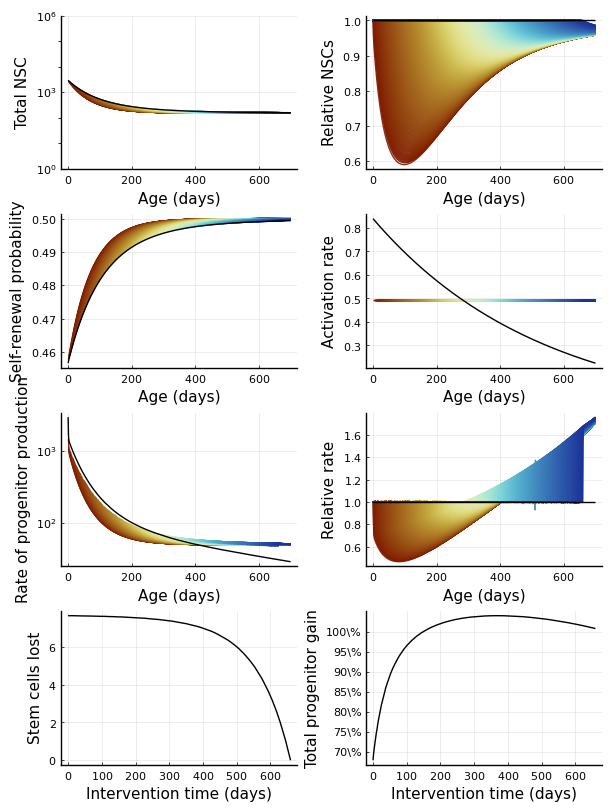

┌ Warning: No strict ticks found
└ @ PlotUtils /home/jooa/.julia/packages/PlotUtils/VgXdq/src/ticks.jl:294


In [81]:
#pgfplots()
pyplot()
itimes = collect(0:1:660)
rawsim = simulate(valuemodel, Dict(:t₁ => 800.0)) # No intervention model
nonsim = link(valuemodel, rawsim)
sim = nonsim
ylabs = link_names(valuemodel)
param = param_beta
hillfun(t₁) = (x, t) -> 1 - hill(t < t₁ ? param[:kab_wt] : param[:kab_ko], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
# Plot base simulation (wt)
p1 = plot(yscale=:log10, ylab=ylabs[1], xlab="Age (days)")
p2 = plot(ylab="Relative NSCs", xlab="Age (days)")
p3 = plot(xlab="Age (days)", ylab="Activation rate")
p4 = plot(xlab="Age (days)",  ylab="Self-renewal probability", legend=:bottomright)
# ???
neurogen_wt = 2 .* 0.95 .* (1 .- hillfun(800.0).(sim[:,1], times)) .* rawsim[:,2]
tot = 2 .* 0.95 .* (1 .- hillfun(800.0).(sim[:,1], times)) .* rawsim[:,2]
tot_wt = sim[:,1]
tot_rel = DataFrame(:t => times, :wt => tot_wt ./ tot_wt)
neurogen_rel = DataFrame(:t => times, :wt => neurogen_wt ./ neurogen_wt)
tot_abs = DataFrame(:t => times, :wt => tot_wt)
neurogen_abs = DataFrame(:t => times, :wt => neurogen_wt)
p5 = plot(yscale=:log10, ylab="Rate of progenitor production", xlab="Age (days)")
p6 = plot(ylab="Relative rate", xlab="Age (days)")
# Plot interventions
colours = cgrad(:roma, length(itimes), categorical=true, rev=false)
# Compute some things
step = times[2] - times[1]
non_neurogen = step .* neurogen_wt
# Preallocate vectors
loss = zeros(Float64, length(itimes))
total_neurogen = zeros(Float64, length(itimes))
for (i, itime) in enumerate(itimes)
    rawsim = simulate(valuemodel, Dict(:t₁ => Float64(itime)))
    changed = times .> itime
    sim = link(valuemodel, rawsim)
    loss[i] = nonsim[findfirst(times .== 660.0), 1] .- sim[findfirst(times .== 660.0),1]
    neurogen = 2 .* 0.95 .* (1 .- hillfun(itime).(sim[:,1], times)) .* rawsim[:,2]
    total_neurogen[i] = sum(neurogen .* step) ./ sum(non_neurogen)
    plot!(p1, times[changed], sim[changed,1], lab="", lc=colours[i], la=0.9)
    plot!(p2, times, sim[:,1] ./ tot_wt, lab="", lc=colours[i], la=0.9)
    #plot!(p3, times[changed], rawsim[changed,3], lab="", lc=colours[i], la=0.9)
    plot!(p3, times[changed], valuemodel_r(itime).(times[changed]), lab="", lc=colours[i], la=0.9)
    plot!(p4, times[changed], hillfun(itime).(sim[changed,1], times[changed]), lab="", lc=colours[i], la=0.9)
    plot!(p5, times[changed], neurogen[changed], lab="", lc=colours[i], la=0.9)
    plot!(p6, times, neurogen ./ neurogen_wt, lab="", lc=colours[i], la=0.9)
    tot_rel[!,"d$(Int64(round(itime)))"] = sim[:,1] ./ tot_wt
    neurogen_rel[!,"d$(Int64(round(itime)))"] = neurogen ./ neurogen_wt
    tot_abs[!,"d$(Int64(round(itime)))"] = sim[:,1]
    neurogen_abs[!,"d$(Int64(round(itime)))"] = neurogen
end
# Plot previous simulation
plot!(p1, times, nonsim[:,1], lab="", lc=:black, lw=2)
plot!(p2, times, nonsim[:,1] ./ nonsim[:,1], lab="", lc=:black, lw=2)
plot!(p3, times, valuemodel_r(900.0), lab="", lc=:black, lw=2)
plot!(p4, times, hillfun(800.0).(nonsim[:,1], times), lab="", lc=:black, lw=2)
plot!(p5, times, neurogen_wt, lc=:black, lw=2, lab="")
plot!(p6, times, neurogen_wt ./ neurogen_wt, lc=:black, lw=2, lab="")
# Plot data
#@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
#@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
# Plot metrics
p7 = plot(itimes, loss, lab="", ylab="Stem cells lost", xlab="Intervention time (days)", lc=:black)
steps = round(minimum(total_neurogen); sigdigits=1):0.05:round(maximum(total_neurogen); sigdigits=1)
p8 = plot(itimes, total_neurogen, lc=:black, lab="", ylab="Total progenitor gain", xlab = "Intervention time (days)",
          ytick=(collect(steps), ["$(Int64(100*x))\\%" for x in steps]))
#p7 = plot(itimes, total_neurogen)
l = @layout [
    p1 p2;
    p3 p4;
    p5 p6;
    p7 p8;
]
plot(p1, p2, p4, p3, p5, p6, p7, p8, lw=1, layout=l, size=(600, 800))
#savefig("jump_activation_semishared_self.tex")
savefig("jump_activation_semishared_self.svg")
#tot_rel |> CSV.write("sims/jump_activation_semishared_self_relative_nsc.csv")
#neurogen_rel |> CSV.write("sims/jump_activation_semishared_self_relative_neurogen.csv")
#tot_abs |> CSV.write("sims/jump_activation_semishared_self_absolute_nsc.csv")
#neurogen_abs |> CSV.write("sims/jump_activation_semishared_self_absolute_neurogen.csv")

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


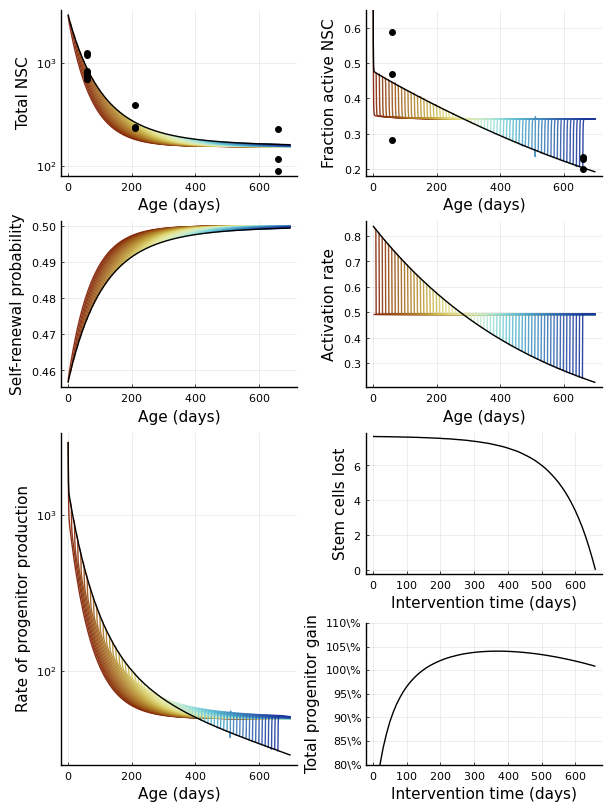

In [82]:
#pgfplots()
pyplot()
rawsim = simulate(valuemodel, Dict(:t₁ => 800.0)) # No intervention model
itimes = collect(0:10:660)
nonsim = link(valuemodel, rawsim)
ylabs = link_names(valuemodel)
param = param_beta
hillfun(t₁) = (x, t) -> 1 - hill(param[:kab_wt], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
# Plot base simulation (wt)
p1 = plot(yscale=:log10, ylab=ylabs[1], xlab="Age (days)")
#p2 = plot(ylab=ylabs[2], xlab="Age (days)")
p2 = plot(ylab=ylabs[2], xlab="Age (days)", ylim=(0.18, 0.65))
p3 = plot(xlab="Age (days)", ylab="Activation rate")
p4 = plot(xlab="Age (days)",  ylab="Self-renewal probability", legend=:bottomright)
# ???
neurogen = 2 .* 0.95 .* (1 .- hillfun(800.0).(sim[:,1], times)) .* rawsim[:,2]
p5 = plot(yscale=:log10, ylab="Rate of progenitor production", xlab="Age (days)")
# Plot interventions
colours = cgrad(:roma, length(itimes), categorical=true, rev=false)
# Compute some things
step = times[2] - times[1]
non_neurogen = step .* neurogen
# Preallocate vectors
loss = zeros(Float64, length(itimes))
total_neurogen = zeros(Float64, length(itimes))
for (i, itime) in enumerate(itimes)
    rawsim = simulate(valuemodel, Dict(:t₁ => Float64(itime)))
    changed = times .> itime
    changed[max(1, findfirst(changed)-5):end] .= true
    sim = link(valuemodel, rawsim)
    loss[i] = nonsim[findfirst(times .== 660.0), 1] .- sim[findfirst(times .== 660.0),1]
    neurogen_tmp = 2 .* 0.95 .* (1 .- hillfun(itime).(sim[:,1], times)) .* rawsim[:,2]
    total_neurogen[i] = sum(neurogen_tmp .* step) ./ sum(non_neurogen)
    plot!(p1, times[changed], sim[changed,1], lab="", lc=colours[i], la=0.9)
    plot!(p2, times[changed], sim[changed,2], lab="", lc=colours[i], la=0.9)
#    plot!(p3, times[changed], rawsim[changed,3], lab="", lc=colours[i], la=0.9)
    plot!(p3, times[changed], valuemodel_r(itime).(times[changed]), lab="", lc=colours[i], la=0.9)
    plot!(p4, times[changed], hillfun(itime).(sim[changed,1], times[changed]), lab="", lc=colours[i], la=0.9)
    plot!(p5, times[changed], neurogen_tmp[changed], lab="", lc=colours[i], la=0.9)
end
# Plot previous sims
plot!(p1, times, nonsim[:,1], lab="", lc=:black, lw=2)
plot!(p2, times, nonsim[:,2], lab="", lc=:black, lw=2)
#p3 = plot(times, param_rt[:wt], lab="wt", lc=:black)
#plot!(p3, times, valuemodel_r(t₁).(times), lab="del", ylab="Activation rate", lc=:red)
#plot!(p3, times, param_rt[:wt], lab="", lc=:black, lw=2)
plot!(p3, times, valuemodel_r(900.0), lab="", lc=:black, lw=2)
plot!(p4, times, hillfun(800.0).(nonsim[:,1], times), lab="", lc=:black, lw=2)
plot!(p5, times, neurogen, lc=:black, lw=2,lab="")
# Plot data
@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
# Plot metrics
p6 = plot(itimes, loss, lab="", ylab="Stem cells lost", xlab="Intervention time (days)", lc=:black)
neurogen_range = maximum(total_neurogen) - minimum(total_neurogen)
steps = 0.80:0.05:1.1
p7 = plot(itimes, total_neurogen, lc=:black, lab="", ylab="Total progenitor gain", xlab = "Intervention time (days)",
          ytick=(collect(steps), ["$(Int64(round(100*x)))\\%" for x in steps]), ylim=(minimum(steps), maximum(steps)))
#p7 = plot(itimes, total_neurogen)
l = @layout [
    p1 p2;
    p3 p4;
    p5{.5h} [p6;
             p7]
]
plot(p1, p2, p4, p3, p5, p6, p7, lw=1, layout=l, size=(600, 800))
#savefig("freeze_activation_individual_self.tex")
savefig("jump_activation_semishared_self.svg")

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


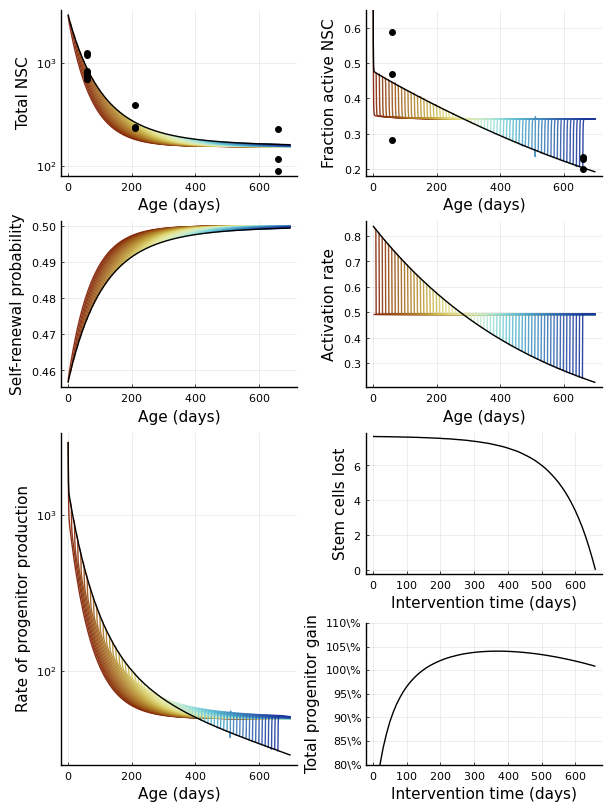

In [83]:
total_mat = 0:10:660
#pgfplots()
pyplot()
rawsim = simulate(valuemodel, Dict(:t₁ => 800.0)) # No intervention model
itimes = collect(0:10:660)
all_nsc = zeros(length(times), length(itimes))
all_neurogen = zeros(length(times), length(itimes))
nonsim = link(valuemodel, rawsim)
ylabs = link_names(valuemodel)
param = param_beta
hillfun(t₁) = (x, t) -> 1 - hill(param[:kab_wt], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
# Plot base simulation (wt)
p1 = plot(yscale=:log10, ylab=ylabs[1], xlab="Age (days)")
#p2 = plot(ylab=ylabs[2], xlab="Age (days)")
p2 = plot(ylab=ylabs[2], xlab="Age (days)", ylim=(0.18, 0.65))
p3 = plot(xlab="Age (days)", ylab="Activation rate")
p4 = plot(xlab="Age (days)",  ylab="Self-renewal probability", legend=:bottomright)
# ???
neurogen = 2 .* 0.95 .* (1 .- hillfun(800.0).(sim[:,1], times)) .* rawsim[:,2]
p5 = plot(yscale=:log10, ylab="Rate of progenitor production", xlab="Age (days)")
# Plot interventions
colours = cgrad(:roma, length(itimes), categorical=true, rev=false)
# Compute some things
step = times[2] - times[1]
non_neurogen = step .* neurogen
# Preallocate vectors
loss = zeros(Float64, length(itimes))
total_neurogen = zeros(Float64, length(itimes))
for (i, itime) in enumerate(itimes)
    rawsim = simulate(valuemodel, Dict(:t₁ => Float64(itime)))
    changed = times .> itime
    changed[max(1, findfirst(changed)-5):end] .= true
    sim = link(valuemodel, rawsim)
    loss[i] = nonsim[findfirst(times .== 660.0), 1] .- sim[findfirst(times .== 660.0),1]
    neurogen_tmp = 2 .* 0.95 .* (1 .- hillfun(itime).(sim[:,1], times)) .* rawsim[:,2]
    total_neurogen[i] = sum(neurogen_tmp .* step) ./ sum(non_neurogen)
    all_nsc[:,i] = sim[:,1]
    plot!(p1, times[changed], sim[changed,1], lab="", lc=colours[i], la=0.9)
    plot!(p2, times[changed], sim[changed,2], lab="", lc=colours[i], la=0.9)
#    plot!(p3, times[changed], rawsim[changed,3], lab="", lc=colours[i], la=0.9)
    plot!(p3, times[changed], valuemodel_r(itime).(times[changed]), lab="", lc=colours[i], la=0.9)
    plot!(p4, times[changed], hillfun(itime).(sim[changed,1], times[changed]), lab="", lc=colours[i], la=0.9)
    plot!(p5, times[changed], neurogen_tmp[changed], lab="", lc=colours[i], la=0.9)
    all_neurogen[:,i] = neurogen_tmp
end
# Plot previous sims
plot!(p1, times, nonsim[:,1], lab="", lc=:black, lw=2)
plot!(p2, times, nonsim[:,2], lab="", lc=:black, lw=2)
#p3 = plot(times, param_rt[:wt], lab="wt", lc=:black)
#plot!(p3, times, valuemodel_r(t₁).(times), lab="del", ylab="Activation rate", lc=:red)
#plot!(p3, times, param_rt[:wt], lab="", lc=:black, lw=2)
plot!(p3, times, valuemodel_r(900.0), lab="", lc=:black, lw=2)
plot!(p4, times, hillfun(800.0).(nonsim[:,1], times), lab="", lc=:black, lw=2)
plot!(p5, times, neurogen, lc=:black, lw=2,lab="")
# Plot data
@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
# Plot metrics
p6 = plot(itimes, loss, lab="", ylab="Stem cells lost", xlab="Intervention time (days)", lc=:black)
neurogen_range = maximum(total_neurogen) - minimum(total_neurogen)
steps = 0.80:0.05:1.1
p7 = plot(itimes, total_neurogen, lc=:black, lab="", ylab="Total progenitor gain", xlab = "Intervention time (days)",
          ytick=(collect(steps), ["$(Int64(round(100*x)))\\%" for x in steps]), ylim=(minimum(steps), maximum(steps)))
#p7 = plot(itimes, total_neurogen)
l = @layout [
    p1 p2;
    p3 p4;
    p5{.5h} [p6;
             p7]
]
plot(p1, p2, p4, p3, p5, p6, p7, lw=1, layout=l, size=(600, 800))
#savefig("freeze_activation_individual_self.tex")
savefig("jump_activation_semishared_self.svg")

In [84]:
DataFrame("time" => itimes, "loss" => loss, "neurogen" => total_neurogen) |> CSV.write("data_export/all_metrics.csv")

"data_export/all_metrics.csv"

In [85]:
neurogen

701-element Vector{Float64}:
 2905.8763736291944
 1661.6974622621224
 1416.2175028933223
 1343.0954577345854
 1300.6694641572635
 1264.6248548525637
 1230.7124056893203
 1198.1653243774574
 1166.8018276690952
 1136.522877208645
 1107.3733095659613
 1079.129443928931
 1052.0172627494176
    ⋮
   29.699723058277534
   29.652592643169385
   29.646707073288386
   29.560277645023245
   29.487034297870398
   29.48324653841649
   29.407130243155517
   29.350600296197122
   29.32605394129574
   29.254411321276336
   29.20846653849023
   29.16416832982201

In [86]:
all_neurogen_df = DataFrame(all_neurogen, ["d$i" for i in itimes])
all_neurogen_df[!,"wt"] = neurogen
all_neurogen_df[!,"time"] = times

701-element Vector{Float64}:
   0.0
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
  10.0
  11.0
  12.0
   ⋮
 689.0
 690.0
 691.0
 692.0
 693.0
 694.0
 695.0
 696.0
 697.0
 698.0
 699.0
 700.0

In [87]:
all_nsc_df = DataFrame(all_nsc, ["d$i" for i in itimes])
all_nsc_df[!,"wt"] = nonsim[:,1] 
all_nsc_df[!,"time"] = times

701-element Vector{Float64}:
   0.0
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
  10.0
  11.0
  12.0
   ⋮
 689.0
 690.0
 691.0
 692.0
 693.0
 694.0
 695.0
 696.0
 697.0
 698.0
 699.0
 700.0

In [88]:
all_neurogen_df |> CSV.write("data_export/all_neurogen.csv")
all_nsc_df |> CSV.write("data_export/all_nsc.csv")

"data_export/all_nsc.csv"

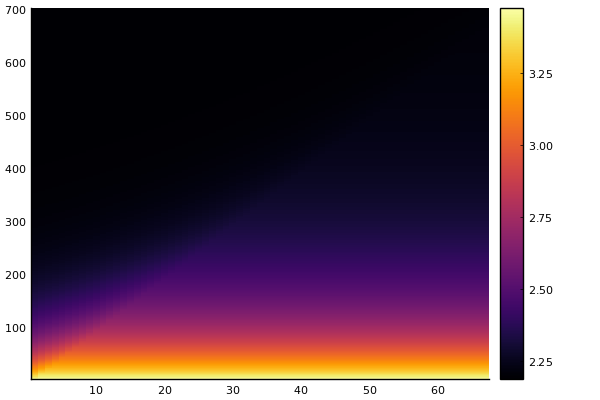

In [89]:
heatmap(log10.(all_nsc))

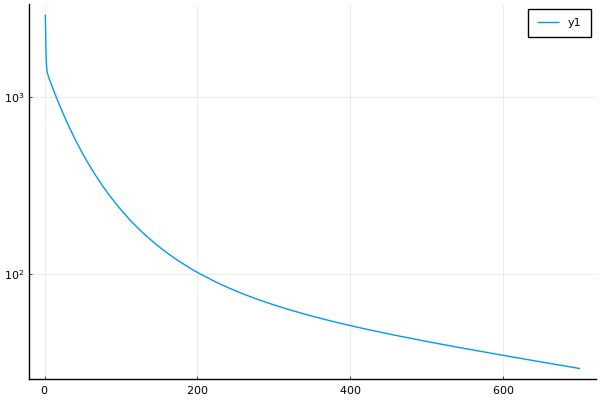

In [90]:
plot(neurogen, yscale=:log10)

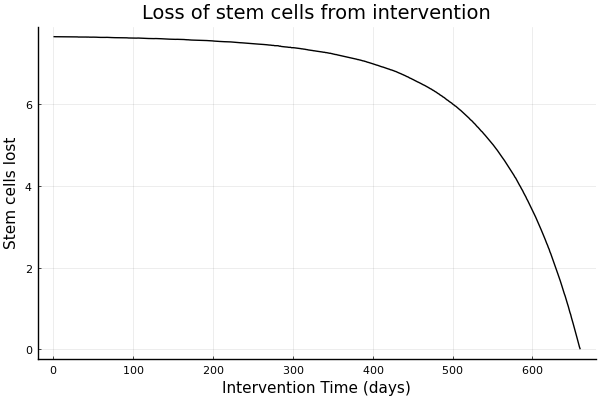

In [91]:
itimes = collect(0:1:660)#[100, 200]#, 60, 100, 300, 600]
itimes = metrics_loss.itime
rawsim = simulate(valuemodel, Dict(:t₁ => 700.0))
regsim = link(valuemodel, rawsim)
nsc660 = regsim[times .== 660.0, 1][1]
nscs = map(itimes) do t₁
    rawsim = simulate(valuemodel, Dict(:t₁ => t₁))
    regsim = link(valuemodel, rawsim)
    nsc660 .- regsim[times .== 660.0, 1][1]
end
metrics_loss[!,"value_partself"] = nscs
plot(itimes, nscs, lc=:black, lab="", xlab="Intervention Time (days)", ylab="Stem cells lost", title="Loss of stem cells from intervention")

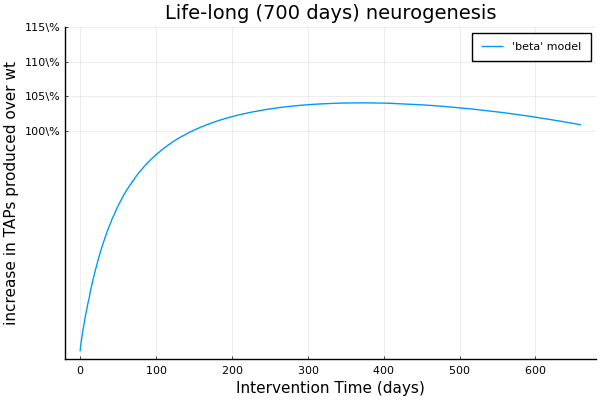

In [92]:
itimes = metrics_loss.itime
int_neurogenesis_1 = zeros(Float64, length(itimes))
#int_neurogenesis_2 = zeros(Float64, length(itimes))
int_neurogenesis_wt = zeros(Float64, length(itimes))
step = times[2] - times[1]
hillfun(t₁) = (x, t) -> 1 - hill(param[:kab_wt], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
for (i, t₁) in enumerate(itimes)
    rawsim = simulate(valuemodel, Dict(:t₁ => Float64(t₁)))
    int_neurogenesis_1[i] = sum(rawsim[:,2] .* 2 .* 0.95 .* (1 .- hillfun(t₁).(rawsim[:,1], times)))
    #rawsim = simulate(valuemodel, Dict(:t₁ => Float64(t₁)))
    #int_neurogenesis_2[i] = sum(rawsim[:,2] .* 2 .* 0.95 .* (1 .- param_bt[:wt].(times)))
    rawsim = simulate(valuemodel, Dict(:t₁ => Float64(700)))
    int_neurogenesis_wt[i] = sum(rawsim[:,2] .* 2 .* 0.95 .* (1 .- hillfun(t₁).(rawsim[:,1], times)))
end
metrics_neurogen[!,"value_partself"] = int_neurogenesis_1 ./ int_neurogenesis_wt
plot(xlab="Intervention Time (days)", ylab="increase in TAPs produced over wt", title="Life-long (700 days) neurogenesis", yticks=([100, 105, 110, 115], ["100\\%", "105\\%", "110\\%", "115\\%"]))
plot!(itimes, int_neurogenesis_1 ./ int_neurogenesis_wt .* 100, lab="'beta' model")
#plot!(itimes, int_neurogenesis_2 ./ int_neurogenesis_wt .* 100, lab="'value' model")
#plot!(itimes, int_neurogenesis_wt .* step, lab="wt", lc=:gray)

## Self-renewal is genotype-invariant

In [93]:
#=
param_value = Dict( # from cofit
    :nsc₀ => 1986.0,
    :r₀ => 0.8426,
    :r₁ => 0.4928,
    :βr => 0.001891,
    :kab => 141.987,
    :nb_wt => 0.0364225,
    :nb_ko => 0.0364225,
    #:nb_ko => 0.0765863,
    :pₛ => 0.95,
)
=#
param_value = Dict( # from cofit
    :nsc₀ => 5000.0,
    :r₀ => 0.672387,
    :r₁ => 0.495324,
    :βr => 0.0015538,
    :kab_wt => 153.724,
    :kab_ko => 153.724,
    :nb_wt => 0.0584954,
    :nb_ko => 0.0584954,
    #:nb_ko => 0.0765863,
    :pₛ => 0.95,
)

Dict{Symbol, Float64} with 9 entries:
  :kab_ko => 153.724
  :kab_wt => 153.724
  :nb_ko  => 0.0584954
  :βr     => 0.0015538
  :r₀     => 0.672387
  :nsc₀   => 5000.0
  :r₁     => 0.495324
  :nb_wt  => 0.0584954
  :pₛ     => 0.95

In [94]:
times = collect(0:1:700.0)
valuemodel = ChangedValueSelf((0.0, 700.0), times, zeros(Int64, length(times)), param_value)

ChangedValueSelf((0.0, 700.0), [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0  …  691.0, 692.0, 693.0, 694.0, 695.0, 696.0, 697.0, 698.0, 699.0, 700.0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [5 => 153.724, 4 => 153.724, 7 => 0.0584954, 3 => 0.0015538, 2 => 0.672387, 1 => 5000.0, 9 => 0.495324, 6 => 0.0584954, 8 => 0.95])

In [95]:
free_parameters(valuemodel)

1-element Vector{Symbol}:
 :t₁

In [96]:
valuemodel_r = t₁ -> broken_exponential_decay(param_value[:r₀], param_value[:βr], param_value[:r₁], t₁)

#561 (generic function with 1 method)

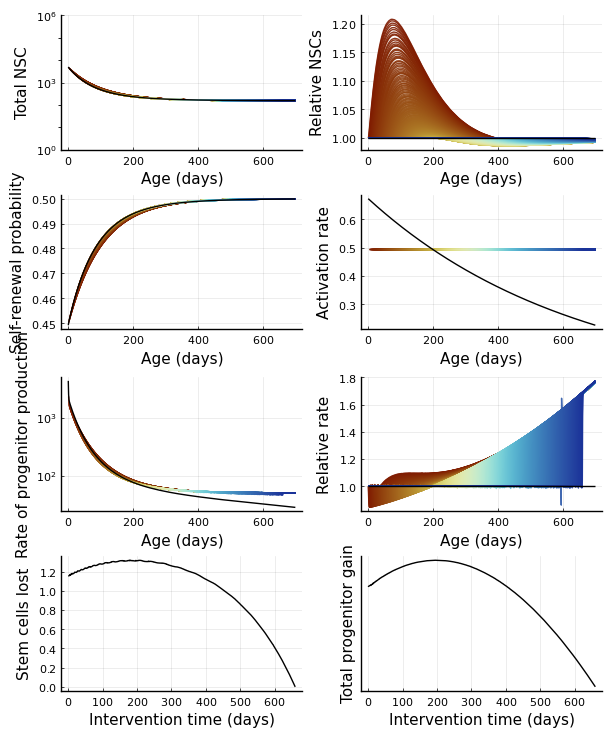

┌ Warning: No strict ticks found
└ @ PlotUtils /home/jooa/.julia/packages/PlotUtils/VgXdq/src/ticks.jl:294


"sims/jump_activation_shared_self_absolute_neurogen.csv"

In [97]:
#pgfplots()
pyplot()
itimes = collect(0:1:660)
rawsim = simulate(valuemodel, Dict(:t₁ => 800.0)) # No intervention model
nonsim = link(valuemodel, rawsim)
sim = nonsim
ylabs = link_names(valuemodel)
param = param_beta
hillfun(t₁) = (x, t) -> 1 - hill(t < t₁ ? param[:kab_wt] : param[:kab_ko], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
# Plot base simulation (wt)
p1 = plot(yscale=:log10, ylab=ylabs[1], xlab="Age (days)")
p2 = plot(ylab="Relative NSCs", xlab="Age (days)")
p3 = plot(xlab="Age (days)", ylab="Activation rate")
p4 = plot(xlab="Age (days)",  ylab="Self-renewal probability", legend=:bottomright)
# ???
neurogen_wt = 2 .* 0.95 .* (1 .- hillfun(800.0).(sim[:,1], times)) .* rawsim[:,2]
tot = 2 .* 0.95 .* (1 .- hillfun(800.0).(sim[:,1], times)) .* rawsim[:,2]
tot_wt = sim[:,1]
tot_rel = DataFrame(:t => times, :wt => tot_wt ./ tot_wt)
neurogen_rel = DataFrame(:t => times, :wt => neurogen_wt ./ neurogen_wt)
tot_abs = DataFrame(:t => times, :wt => tot_wt)
neurogen_abs = DataFrame(:t => times, :wt => neurogen_wt)
p5 = plot(yscale=:log10, ylab="Rate of progenitor production", xlab="Age (days)")
p6 = plot(ylab="Relative rate", xlab="Age (days)")
# Plot interventions
colours = cgrad(:roma, length(itimes), categorical=true, rev=false)
# Compute some things
step = times[2] - times[1]
non_neurogen = step .* neurogen_wt
# Preallocate vectors
loss = zeros(Float64, length(itimes))
total_neurogen = zeros(Float64, length(itimes))
for (i, itime) in enumerate(itimes)
    rawsim = simulate(valuemodel, Dict(:t₁ => Float64(itime)))
    changed = times .> itime
    sim = link(valuemodel, rawsim)
    loss[i] = nonsim[findfirst(times .== 660.0), 1] .- sim[findfirst(times .== 660.0),1]
    neurogen = 2 .* 0.95 .* (1 .- hillfun(itime).(sim[:,1], times)) .* rawsim[:,2]
    total_neurogen[i] = sum(neurogen .* step) ./ sum(non_neurogen)
    plot!(p1, times[changed], sim[changed,1], lab="", lc=colours[i], la=0.9)
    plot!(p2, times, sim[:,1] ./ tot_wt, lab="", lc=colours[i], la=0.9)
    #plot!(p3, times[changed], rawsim[changed,3], lab="", lc=colours[i], la=0.9)
    plot!(p3, times[changed], valuemodel_r(itime).(times[changed]), lab="", lc=colours[i], la=0.9)
    plot!(p4, times[changed], hillfun(itime).(sim[changed,1], times[changed]), lab="", lc=colours[i], la=0.9)
    plot!(p5, times[changed], neurogen[changed], lab="", lc=colours[i], la=0.9)
    plot!(p6, times, neurogen ./ neurogen_wt, lab="", lc=colours[i], la=0.9)
    tot_rel[!,"d$(Int64(round(itime)))"] = sim[:,1] ./ tot_wt
    neurogen_rel[!,"d$(Int64(round(itime)))"] = neurogen ./ neurogen_wt
    tot_abs[!,"d$(Int64(round(itime)))"] = sim[:,1]
    neurogen_abs[!,"d$(Int64(round(itime)))"] = neurogen
end
# Plot previous simulation
plot!(p1, times, nonsim[:,1], lab="", lc=:black, lw=2)
plot!(p2, times, nonsim[:,1] ./ nonsim[:,1], lab="", lc=:black, lw=2)
plot!(p3, times, valuemodel_r(900.0), lab="", lc=:black, lw=2)
plot!(p4, times, hillfun(800.0).(nonsim[:,1], times), lab="", lc=:black, lw=2)
plot!(p5, times, neurogen_wt, lc=:black, lw=2, lab="")
plot!(p6, times, neurogen_wt ./ neurogen_wt, lc=:black, lw=2, lab="")
# Plot data
#@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
#@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
# Plot metrics
p7 = plot(itimes, loss, lab="", ylab="Stem cells lost", xlab="Intervention time (days)", lc=:black)
steps = round(minimum(total_neurogen); sigdigits=1):0.05:round(maximum(total_neurogen); sigdigits=1)
p8 = plot(itimes, total_neurogen, lc=:black, lab="", ylab="Total progenitor gain", xlab = "Intervention time (days)",
          ytick=(collect(steps), ["$(Int64(100*x))\\%" for x in steps]))
#p7 = plot(itimes, total_neurogen)
l = @layout [
    p1 p2;
    p3 p4;
    p5 p6;
    p7 p8;
]
plot(p1, p2, p4, p3, p5, p6, p7, p8, lw=1, layout=l, size=(600, 800))
#savefig("jump_activation_shared_self.tex")
savefig("jump_activation_shared_self.svg")
tot_rel |> CSV.write("sims/jump_activation_shared_self_relative_nsc.csv")
neurogen_rel |> CSV.write("sims/jump_activation_shared_self_relative_neurogen.csv")
tot_abs |> CSV.write("sims/jump_activation_shared_self_absolute_nsc.csv")
neurogen_abs |> CSV.write("sims/jump_activation_shared_self_absolute_neurogen.csv")

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


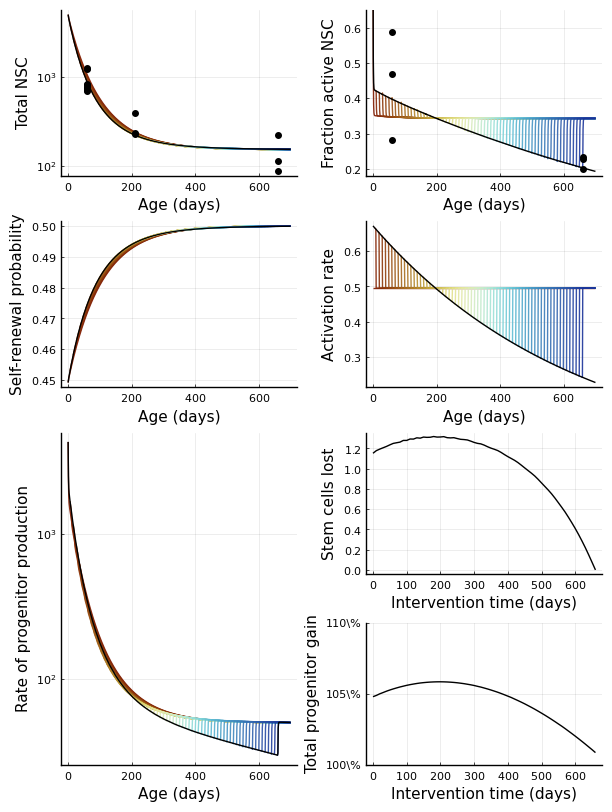

In [98]:
#pgfplots()
pyplot()
rawsim = simulate(valuemodel, Dict(:t₁ => 800.0)) # No intervention model
itimes = collect(0:10:660)
nonsim = link(valuemodel, rawsim)
ylabs = link_names(valuemodel)
param = param_beta
hillfun(t₁) = (x, t) -> 1 - hill(param[:kab_wt], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
# Plot base simulation (wt)
p1 = plot(yscale=:log10, ylab=ylabs[1], xlab="Age (days)")
#p2 = plot(ylab=ylabs[2], xlab="Age (days)")
p2 = plot(ylab=ylabs[2], xlab="Age (days)", ylim=(0.18, 0.65))
p3 = plot(xlab="Age (days)", ylab="Activation rate")
p4 = plot(xlab="Age (days)",  ylab="Self-renewal probability", legend=:bottomright)
# ???
neurogen = 2 .* 0.95 .* (1 .- hillfun(800.0).(sim[:,1], times)) .* rawsim[:,2]
p5 = plot(yscale=:log10, ylab="Rate of progenitor production", xlab="Age (days)")
# Plot interventions
colours = cgrad(:roma, length(itimes), categorical=true, rev=false)
# Compute some things
step = times[2] - times[1]
non_neurogen = step .* neurogen
# Preallocate vectors
loss = zeros(Float64, length(itimes))
total_neurogen = zeros(Float64, length(itimes))
for (i, itime) in enumerate(itimes)
    rawsim = simulate(valuemodel, Dict(:t₁ => Float64(itime)))
    changed = times .> itime
    changed[max(1, findfirst(changed)-5):end] .= true
    sim = link(valuemodel, rawsim)
    loss[i] = nonsim[findfirst(times .== 660.0), 1] .- sim[findfirst(times .== 660.0),1]
    neurogen = 2 .* 0.95 .* (1 .- hillfun(itime).(sim[:,1], times)) .* rawsim[:,2]
    total_neurogen[i] = sum(neurogen .* step) ./ sum(non_neurogen)
    plot!(p1, times[changed], sim[changed,1], lab="", lc=colours[i], la=0.9)
    plot!(p2, times[changed], sim[changed,2], lab="", lc=colours[i], la=0.9)
#    plot!(p3, times[changed], rawsim[changed,3], lab="", lc=colours[i], la=0.9)
    plot!(p3, times[changed], valuemodel_r(itime).(times[changed]), lab="", lc=colours[i], la=0.9)
    plot!(p4, times[changed], hillfun(itime).(sim[changed,1], times[changed]), lab="", lc=colours[i], la=0.9)
    plot!(p5, times[changed], neurogen[changed], lab="", lc=colours[i], la=0.9)
end
# Plot previous sims
plot!(p1, times, nonsim[:,1], lab="", lc=:black, lw=2)
plot!(p2, times, nonsim[:,2], lab="", lc=:black, lw=2)
#p3 = plot(times, param_rt[:wt], lab="wt", lc=:black)
#plot!(p3, times, valuemodel_r(t₁).(times), lab="del", ylab="Activation rate", lc=:red)
#plot!(p3, times, param_rt[:wt], lab="", lc=:black, lw=2)
plot!(p3, times, valuemodel_r(900.0), lab="", lc=:black, lw=2)
plot!(p4, times, hillfun(800.0).(nonsim[:,1], times), lab="", lc=:black, lw=2)
plot!(p5, times, neurogen, lc=:black, lw=2,lab="")
# Plot data
@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
# Plot metrics
p6 = plot(itimes, loss, lab="", ylab="Stem cells lost", xlab="Intervention time (days)", lc=:black)
neurogen_range = maximum(total_neurogen) - minimum(total_neurogen)
steps = 1.00:0.05:1.1
p7 = plot(itimes, total_neurogen, lc=:black, lab="", ylab="Total progenitor gain", xlab = "Intervention time (days)",
          ytick=(collect(steps), ["$(Int64(round(100*x)))\\%" for x in steps]))
#p7 = plot(itimes, total_neurogen)
l = @layout [
    p1 p2;
    p3 p4;
    p5{.5h} [p6;
             p7]
]
plot(p1, p2, p4, p3, p5, p6, p7, lw=1, layout=l, size=(600, 800))
#savefig("freeze_activation_individual_self.tex")
savefig("jump_activation_shared_self.svg")

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


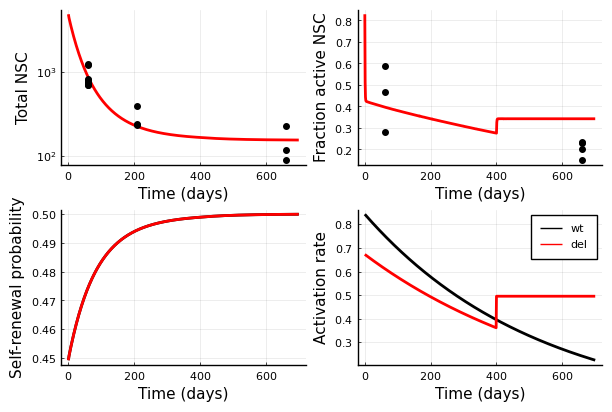

In [99]:
t₁ = 400.0
rawsim = simulate(valuemodel, Dict(:t₁ => t₁))
sim = link(valuemodel, rawsim)
ylabs = link_names(valuemodel)
param = param_value
hillfun(t₁) = (x, t) -> 1 - hill(param[:kab_wt], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
p1 = plot(times, sim[:,1], lab="", lc=:red, lw=2, yscale=:log10, ylab=ylabs[1])
@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
p2 = plot(times, sim[:,2], lab="", lc=:red, lw=2, ylab=ylabs[2])
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
p3 = plot(times, param_rt[:wt], lab="wt", lc=:black)
plot!(p3, times, valuemodel_r(t₁).(times), lab="del", ylab="Activation rate", lc=:red)
p4 = plot(times, hillfun(800.0).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:black)
plot!(p4, times, hillfun(t₁).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:red)
plot(p1, p2, p4, p3, xlab="Time (days)", lw=2)
savefig("valuemodel_static.svg")

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


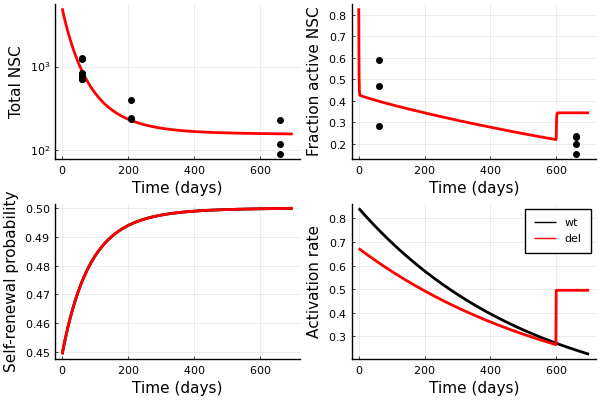

In [100]:
t₁ = 600.0
rawsim = simulate(valuemodel, Dict(:t₁ => t₁))
sim = link(valuemodel, rawsim)
ylabs = link_names(valuemodel)
param = param_value
hillfun(t₁) = (x, t) -> 1 - hill(param[:kab_wt], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
p1 = plot(times, sim[:,1], lab="", lc=:red, lw=2, yscale=:log10, ylab=ylabs[1])
@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
p2 = plot(times, sim[:,2], lab="", lc=:red, lw=2, ylab=ylabs[2])
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
p3 = plot(times, param_rt[:wt], lab="wt", lc=:black)
plot!(p3, times, valuemodel_r(t₁).(times), lab="del", ylab="Activation rate", lc=:red)
p4 = plot(times, hillfun(800.0).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:black)
plot!(p4, times, hillfun(t₁).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:red)
plot(p1, p2, p4, p3, xlab="Time (days)", lw=2)

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


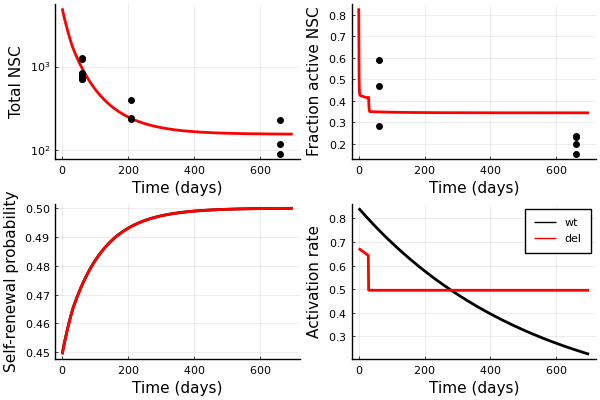

In [101]:
t₁ = 30.0
rawsim = simulate(valuemodel, Dict(:t₁ => t₁))
sim = link(valuemodel, rawsim)
ylabs = link_names(valuemodel)
param = param_value
hillfun(t₁) = (x, t) -> 1 - hill(param[:kab_wt], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
p1 = plot(times, sim[:,1], lab="", lc=:red, lw=2, yscale=:log10, ylab=ylabs[1])
@df @where(data, :genotype .== "wt", :name .== "total") scatter!(p1, :age, :value, mc=:black, lab="")
p2 = plot(times, sim[:,2], lab="", lc=:red, lw=2, ylab=ylabs[2])
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
p3 = plot(times, param_rt[:wt], lab="wt", lc=:black)
plot!(p3, times, valuemodel_r(t₁).(times), lab="del", ylab="Activation rate", lc=:red)
p4 = plot(times, hillfun(800.0).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:black)
plot!(p4, times, hillfun(t₁).(sim[:,1], times), lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:red)
plot(p1, p2, p4, p3, xlab="Time (days)", lw=2)

┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822
┌ Warning: `@where is deprecated, use `@subset` instead.
└ @ DataFramesMeta /home/jooa/.julia/packages/DataFramesMeta/yzaoq/src/macros.jl:822


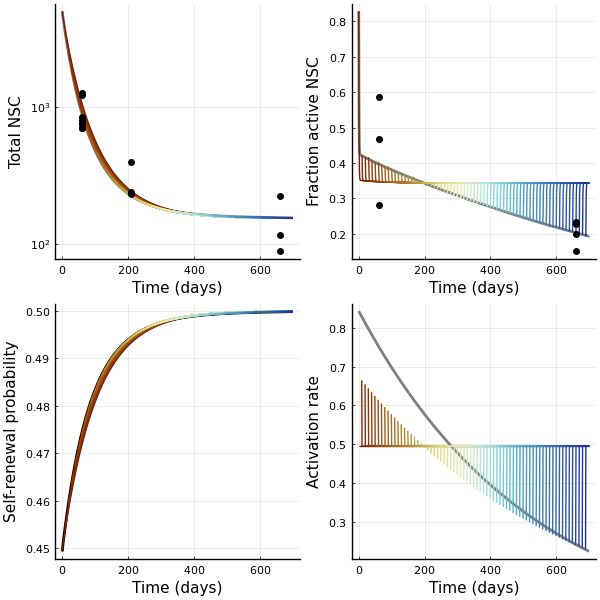

In [102]:
itimes = collect(0:10:699)#[100, 200]#, 60, 100, 300, 600]
colours = cgrad(:roma, length(itimes), categorical=true, rev=false)
rawsim = simulate(valuemodel, Dict(:t₁ => 700.0))
sim = link(valuemodel, rawsim)
ylabs = link_names(valuemodel)
p1 = plot(times, sim[:,1], lab="", lc=:gray, lw=2, yscale=:log10, ylab=ylabs[1])
p2 = plot(times, sim[:,2], lab="", lc=:gray, lw=2, ylab=ylabs[2])
p3 = plot(times, param_rt[:wt], lab="", ylab="Activation rate", lc=:gray, lw=2)
#p4 = plot(times, param_bt[:wt], lab="", ylab="Self-renewal probability", legend=:bottomright, lc=:black, lw=2)
p4 = plot(times, hillfun(800).(sim[:,1], times), lab="", 
          ylab="Self-renewal probability", legend=:bottomright, lc=:black, lw=2)
for (i, t₁) in enumerate(itimes)
    rawsim = simulate(valuemodel, Dict(:t₁ => Float64(t₁)))
    sim = link(valuemodel, rawsim)
    has_changed = times .> t₁
    has_changed[max(1, findfirst(has_changed)-3):end] .= true
    plot!(p1, times[has_changed], sim[has_changed,1], lab="", lw=1, lc=colours[i]) #t₁=$t₁
    plot!(p2, times[has_changed], sim[has_changed,2], lab="", lw=1, lc=colours[i])
    plot!(p3, times[has_changed], valuemodel_r(t₁).(times[has_changed]), lab="", lw=1, lc=colours[i])
    plot!(p4, times[has_changed], hillfun(t₁).(sim[:,1], times)[has_changed], lab="", lw=1, lc=colours[i])
end
#plot!(p1, times, sim[:,1], lab="", lc=:red, lw=2)
@df @where(data, :genotype .== "wt", :name .== "total")  scatter!(p1, :age, :value, mc=:black, lab="")
@df @where(data, :genotype .== "wt", :name .== "active") scatter!(p2, :age, :value, mc=:black, lab="")
plot(p1, p2, p4, p3, xlab="Time (days)", size=(600, 600))

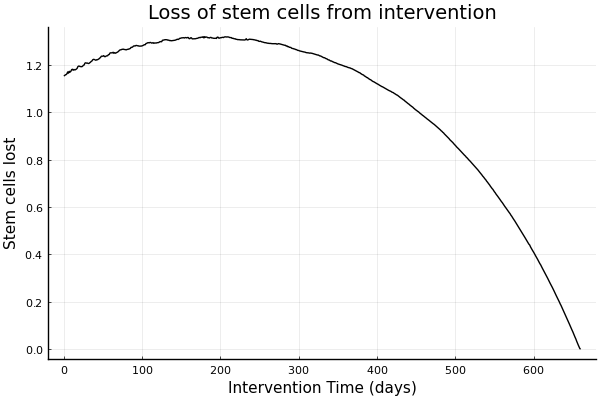

In [103]:
itimes = collect(0:1:660)#[100, 200]#, 60, 100, 300, 600]
itimes = metrics_loss.itime
rawsim = simulate(valuemodel, Dict(:t₁ => 700.0))
regsim = link(valuemodel, rawsim)
nsc660 = regsim[times .== 660.0, 1][1]
nscs = map(itimes) do t₁
    rawsim = simulate(valuemodel, Dict(:t₁ => t₁))
    regsim = link(valuemodel, rawsim)
    nsc660 .- regsim[times .== 660.0, 1][1]
end
metrics_loss[!,"value_noself"] = nscs
plot(itimes, nscs, lc=:black, lab="", xlab="Intervention Time (days)", ylab="Stem cells lost", title="Loss of stem cells from intervention")

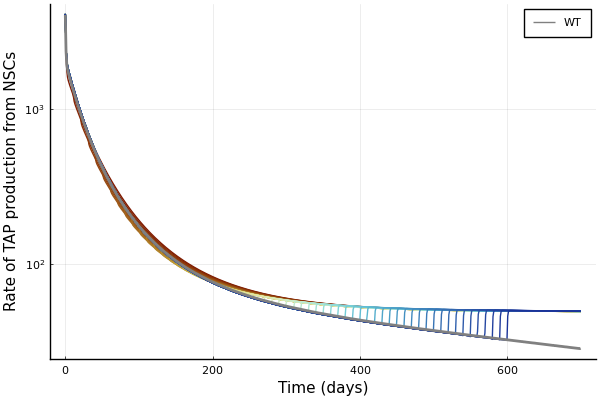

In [104]:
itimes = collect(0:10:600)#[100, 200]#, 60, 100, 300, 600]
colours = cgrad(:roma, length(itimes), categorical=true, rev=false)
rawsim = simulate(valuemodel, Dict(:t₁ => 700.0))
sim = link(valuemodel, rawsim)
p = plot(xlab="Time (days)", ylab="Rate of TAP production from NSCs", yscale=:log10)
hillfun(t₁) = (x, t) -> 1 - hill(param[:kab_wt], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
for (i, t₁) in enumerate(itimes)
    rawsim = simulate(valuemodel, Dict(:t₁ => Float64(t₁)))
    #has_changed = times .> t₁
    plot!(p, times, rawsim[:,2] .* 2 .* 0.95 .* (1 .- hillfun(t₁).(rawsim[:,1], times)), lab="", lc=colours[i])
end
rawsim = simulate(valuemodel, Dict(:t₁ => Float64(700)))
plot!(p, times, rawsim[:,2] .* 2 .* 0.95 .* (1 .- param_bt[:wt].(times)), lab="WT", lc=:gray, lw=2)
#plot!(p, sim_ifnko_both.t, sim_ifnko_both.active .* sim_ifnko_both.counts .* sim_ifnko_both.b .* 2 .* 0.95, lab="KO", lc=:red, lw=2)
p
#savefig("plots/scenario1-lifelong-neurogenesis.svg")

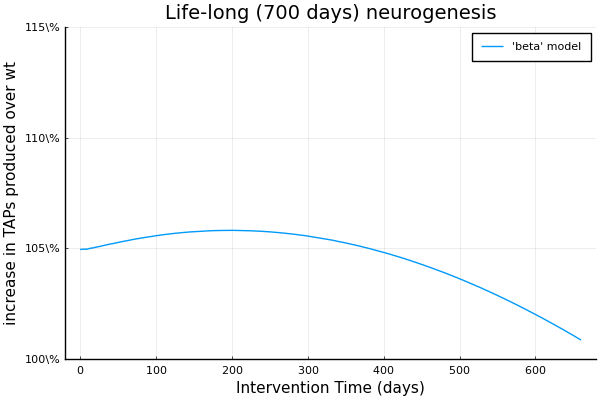

In [105]:
itimes = metrics_loss.itime
int_neurogenesis_1 = zeros(Float64, length(itimes))
#int_neurogenesis_2 = zeros(Float64, length(itimes))
int_neurogenesis_wt = zeros(Float64, length(itimes))
step = times[2] - times[1]
hillfun(t₁) = (x, t) -> 1 - hill(param[:kab_wt], t < t₁ ? param[:nb_wt] : param[:nb_ko])(x)
for (i, t₁) in enumerate(itimes)
    rawsim = simulate(valuemodel, Dict(:t₁ => Float64(t₁)))
    int_neurogenesis_1[i] = sum(rawsim[:,2] .* 2 .* 0.95 .* (1 .- hillfun(t₁).(rawsim[:,1], times)))
    #rawsim = simulate(valuemodel, Dict(:t₁ => Float64(t₁)))
    #int_neurogenesis_2[i] = sum(rawsim[:,2] .* 2 .* 0.95 .* (1 .- param_bt[:wt].(times)))
    rawsim = simulate(valuemodel, Dict(:t₁ => Float64(700)))
    int_neurogenesis_wt[i] = sum(rawsim[:,2] .* 2 .* 0.95 .* (1 .- hillfun(t₁).(rawsim[:,1], times)))
end
metrics_neurogen[!,"value_noself"] = int_neurogenesis_1 ./ int_neurogenesis_wt
plot(xlab="Intervention Time (days)", ylab="increase in TAPs produced over wt", title="Life-long (700 days) neurogenesis", yticks=([100, 105, 110, 115], ["100\\%", "105\\%", "110\\%", "115\\%"]))
plot!(itimes, int_neurogenesis_1 ./ int_neurogenesis_wt .* 100, lab="'beta' model")
#plot!(itimes, int_neurogenesis_2 ./ int_neurogenesis_wt .* 100, lab="'value' model")
#plot!(itimes, int_neurogenesis_wt .* step, lab="wt", lc=:gray)

# Big comparison

In [106]:
names(metrics_neurogen)

8-element Vector{String}:
 "itime"
 "type"
 "beta_fullself"
 "beta_partself"
 "beta_noself"
 "value_fullself"
 "value_partself"
 "value_noself"

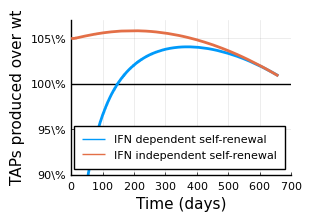

In [107]:
ticks = 0.9:0.05:1.07
p = plot(legend=:bottomright, 
         ylim=(0.9, 1.07), 
         xlim=(0, 700),
         size=(300, 200),
         ytick=(ticks, ["$(round(Int64, 100*x))\\%" for x in ticks]),
         xlab="Time (days)", ylab="TAPs produced over wt")
Plots.abline!(0, 1, lab="", lc=:black)
#@df metrics_neurogen plot!(:itime, :beta_selfinteraction, lab="`beta` model with interaction", lw=2, lc=1)
#@df metrics_neurogen plot!(:itime, :beta_selfinvariant, lab="`beta` model without interaction", lw=2, lc=2)
@df metrics_neurogen plot!(:itime, :value_partself, lab="IFN dependent self-renewal", lw=2, lc=1)
@df metrics_neurogen plot!(:itime, :value_noself, lab="IFN independent self-renewal", lw=2, lc=2)
savefig("plot/life-long-pop-self.svg")

In [121]:
neurogen = @linq metrics_neurogen |>
    select(:t = :itime, :neurogen_dependent = :value_partself, :neurogen_independent = :value_noself)
loss = @linq metrics_loss |> 
    select(:t = :itime, :loss_dependent = :value_partself, :loss_independent = :value_noself)
innerjoin(neurogen, loss, on="t") |> CSV.write("metrics.csv")

"metrics.csv"

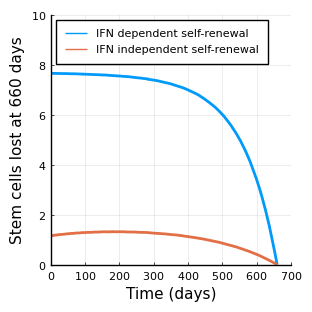

In [108]:
p = plot(legend=:topleft, xlab="Time (days)", ylab="Stem cells lost at 660 days",
         size=(300, 300),
         xlim=(0, 700), ylim=(0, 10))
#@df metrics_loss plot!(:itime, :beta_selfinteraction, lab="`beta` model with interaction", lw=2)
#@df metrics_loss plot!(:itime, :beta_selfinvariant, lab="`beta` model without interaction", lw=2)
#@df metrics_loss plot!(:itime, :value_selfinteraction, lab="Independent self-renewal", lw=2)
#@df metrics_loss plot!(:itime, :value_selfinvariant, lab="Combined self-renewal", lw=2)
@df metrics_loss plot!(:itime, :value_partself, lab="IFN dependent self-renewal", lw=2, lc=1)
@df metrics_loss plot!(:itime, :value_noself, lab="IFN independent self-renewal", lw=2, lc=2)
savefig("plot/loss-pop-self.svg")

# Blub

In [109]:
struct ChangedBetaSelf <: ODEModel
    tspan::Tuple{Float64, Float64}
    times::Vector{Float64}
    values::Vector{Int64}
    fixed::Vector{Pair{Int64, Float64}}
    ChangedBetaSelf(tspan, times, values, fixed::Vector{Pair{I, N}}) where {I <: Integer, N <: Number} = new(tspan, times, values, fixed)
end
function ratefun(model::ChangedBetaSelf)
    function(du, u, p, t)
        _, _, βr, kab, nb_wt, nb_ko, pₛ, t₁ = p
        Q = u[1]; A = u[2]; r = u[3]
        b = 1 - hill(kab, t < t₁ ? nb_wt : nb_ko, Q+A)
        du[1] = dQ = -r * Q + 2* b * pₛ * A
        du[2] = dA = r * Q - pₛ * A
        if t < t₁
            du[3] = dr = -βr * r
        else
            du[3] = dr = 0
        end
    end
end
function initial(t::ChangedBetaSelf, x::AbstractVector)
    nsc₀, r₀, _, kab, nb_wt, _, pₛ, _ = x
    b₀ = hill(kab, nb_wt, 0)
    ratio = sqrt(((pₛ - r₀)/(2*r₀))^2 + (2*b₀*pₛ) / r₀)
    vcat(nsc₀ .* [1-1/(ratio+1), 1/(ratio+1)], [r₀])
end
link(t::ChangedBetaSelf, x::AbstractArray) = hcat(x[:,1] .+ x[:,2], x[:,2] ./ (x[:,1] .+ x[:,2]))
parameter_names(t::Type{ChangedBetaSelf}) = [:nsc₀, :r₀, :βr, :kab, :nb_wt, :nb_ko, :pₛ, :t₁]
bounds(t::ChangedBetaSelf) = [(100.0, 10000.0), (0.0, 1.0), (0.0, 0.1), (0.0, 1000.0), (0.01, 0.1), (0.01, 0.1), (0.0, 1.0), (0.0, 700.0)]
output_names(t::ChangedBetaSelf) = ["qNSC", "aNSC", "r"]
link_names(t::ChangedBetaSelf) = ["Total NSC", "Fraction active NSC"]

link_names (generic function with 4 methods)